In [3]:
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import spectral_analysis as sa
from scipy.special import erf
import datafidelity as df
import composite

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# all_uv = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"
# SN_Array = composite.grab(all_uv, multi_epoch = True, make_corr = False)
# for SN in SN_Array:
#     if SN.minwave < 2800.:
#         print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [6]:
# print 'Need Phases:'
# for SN in SN_Array:
#     if SN.phase == None:
#         print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave
# print
# print 'Need dm15s:'
# for SN in SN_Array:
#     if SN.dm15_source == None and SN.dm15_from_fits == None:
#         print SN.name, SN.filename, SN.mjd, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [7]:
# test_uv_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase between -3 and 3 and source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"]
# comp_test_uv, sn_arrays_test_uv, boot_sn_arrays_test_uv = query_db.main(len(test_uv_query), test_uv_query, boot='nb', medmean=2, verbose=True, multi_epoch=False, selection='max_coverage')

In [8]:
# dm15s = []
# for SN in sn_arrays_test_uv[0]:
#     if SN.dm15_source != None:
#         dm15s.append(SN.dm15_source)
#     else:
#         dm15s.append(SN.dm15_from_fits)
# plt.hist(dm15s, bins = 20)
# plt.show()

In [9]:
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]

query_dm15_max_fewer_bins = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]


In [10]:
comps_dm15_max_fewer_bins_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot=True, medmean=2, gini_balance=False, verbose=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
106 Total Spectra found
2 flagged spectra removed 104 spectra left
0 spectra of peculiar Ias removed 104 spectra left
101 spectra of SNe with host reddening corrections
Arrays cleaned
2 spectra may have telluric contamination


composite.py:1220: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1257: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


32 total SNe
2005eq_combined None 80.5570871212 0.88 0.0862330450236 53654.168 53654.376 bsnip 15.0 0.1976 3230.0 10204.0
2006ot_combined None 68.9455989575 0.84 0.151827088299 54064.875 54062.362 bsnip 10.0 0.8146 2960.0 8782.0
2004as_combined None 128.96248507 0.92 -0.166388828093 53085.754 53082.36 cfa None 0.2321 3612.0 7312.0
2006gr_combined None 67.321929595 0.81 -2.29820799221 54011.898 54008.3 cfa 12.0 0.3222 3362.0 7172.0
1994s_combined None 57.7709844722 0.94 0.811932148791 49518.324 49519.338 bsnip 11.0 0.00291627 3076.0 11130.0
1999dq_combined None 271.858824596 0.86 0.443819835146 51435.137 51438.521 bsnip 14.0 0.4492 3256.0 10400.0
2006oa_combined None 32.910195362 0.89 -0.835051703293 54066.02 54064.08 cfa None 0.2003 3282.0 6992.0
2009ig_combined None 13.3852486419 0.89 -0.511917686592 55080.664 None swift_uv 10.0 0.00157685 1886.0 6726.0
2002cd_combined None 58.3107270741 0.84 0.943201986759 52383.133 52384.51 bsnip 13.0 1.3704 3270.0 10292.0
2013dy_combined None 79.72

C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))
80 Total Spectra found
3 flagged spectra removed 77 spectra left
0 spectra of peculiar Ias removed 77 spectra left
69 spectra of SNe with host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
20 total SNe
1995e_combined None 99.1699157915 1.16 -1.60406769776 49774.516 49772.314 bsnip 12.0 2.0822 3088.0 11210.0
2002er_combined None 427.796113132 1.23 0.507638008716 52525.035 52527.0 other 10.0 0.3865 3186.0 10010.0
2003cq_combined None 29.7421174707 1.2 -0.903505346405 52738.84 52737.446 bsnip 13.0 0.3021 3036.0 10064.0
2002kf_combined None 76.2131661267 1.2 1.63145694232 52637.797 52639.34 cfa None 0.0028611 3652.0 7396.0
2002cr_combined None 202.706369455 1.19 -0.454357748121 51029.527 51026.4 cfa 13.0 0.3894 3

In [11]:
SN = sn_arrays_med[0][0]
print np.median(SN.ivar[SN.x1:SN.x2])

132774.607394


In [12]:
comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot=True, medmean=1, gini_balance=True, verbose=True, measure_vs=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
106 Total Spectra found
2 flagged spectra removed 104 spectra left
0 spectra of peculiar Ias removed 104 spectra left
101 spectra of SNe with host reddening corrections
Arrays cleaned
2 spectra may have telluric contamination
32 total SNe
2005eq_combined None 80.5570871212 0.88 0.0862330450236 53654.168 53654.376 bsnip 15.0 0.1976 3230.0 10204.0
2006ot_combined None 68.9455989575 0.84 0.151827088299 54064.875 54062.362 bsnip 10.0 0.8146 2960.0 8782.0
2004as_combined None 128.96248507 0.92 -0.166388828093 53085.754 53082.36 cfa None 0.2321 3612.0 7312.0
2006gr_combined None 67.321929595 0.81 -2.29820799221 54011.898 54008.3 cfa 12.0 0.3222 3362.0 7172.0
1994s_combined None 57.7709844722 0.94 0.811932148791 49518.324 49519.338 bsnip 11.0 0.00291627 3076.0 11130.0
1999dq_combined None 271.858824596 0.86 0.443819835146 51435.137 514

gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 10 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
237 Total Spectra found
15 flagged spectra removed 222 spectra left
3 spectra of peculiar Ias removed 219 spectra left
193 spectra of SNe with host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
67 total SNe
2005ag_combined None 18.8884044553 1.04651897756 -0.56996982891 53414.32 53413.596 bsnip None 0.1422 3504.0 8566.0
2003du_combined None 1040.8480714 1.07 0.708000627976 52765.438 52769.0 other 17.0 0.00298261 3186.0 10032.0
2005cf_combined None 245.984015366 1.1 -0.990250526489 53533.328 53531.0 uv 8.0 0.2019 1990.0 10432.0
2002ck_combined None 67.8232137106 1.08 1.66209765686 52396.07 52396.46 cfa 12.0 0.1625 3616.0 7320.0
2002fk_

gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 20 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))
80 Total Spectra found
3 flagged spectra removed 77 spectra left
0 spectra of peculiar Ias removed 77 spectra left
69 spectra of SNe with host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
20 total SNe
1995e_combined None 99.1699157915 1.16 -1.60406769776 49774.516 49772.314 bsnip 12.0 2.0822 3088.0 11210.0
2002er_combined None 427.796113132 1.23 0.507638008716 52525.035 52527.0 other 10.0 0.3865 3186.0 10010.0
2003cq_combined None 29.7421174707 1.2 -0.903505346405 52738.84 52737.446 bsnip 13.0 0.3021 3036.0 10064.0
2002kf_combined None 76.2131661267 1.2 1.63145694232 52637.797 52639.34 cfa None 0.0028611 3652.0 7396.0
2002cr_combin

0.36 0.86 0.018
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=32_Nspec=101_phase=p0.36_dm15=0.86_z=0.018.txt
0.22 1.06 0.012
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=66_Nspec=192_phase=p0.22_dm15=1.06_z=0.012.txt
-0.01 1.2 0.017
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=18_Nspec=58_phase=m0.01_dm15=1.2_z=0.017.txt
0.39 1.32 0.015
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=24_Nspec=95_phase=p0.39_dm15=1.32_z=0.015.txt
-0.09 1.57 0.017
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=22_Nspec=68_phase=m0.09_dm15=1.57_z=0.017.txt
-0.04 1.87 0.01
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=15_Nspec=43_phase=m0.04_dm15=1.87_z=0.01.txt


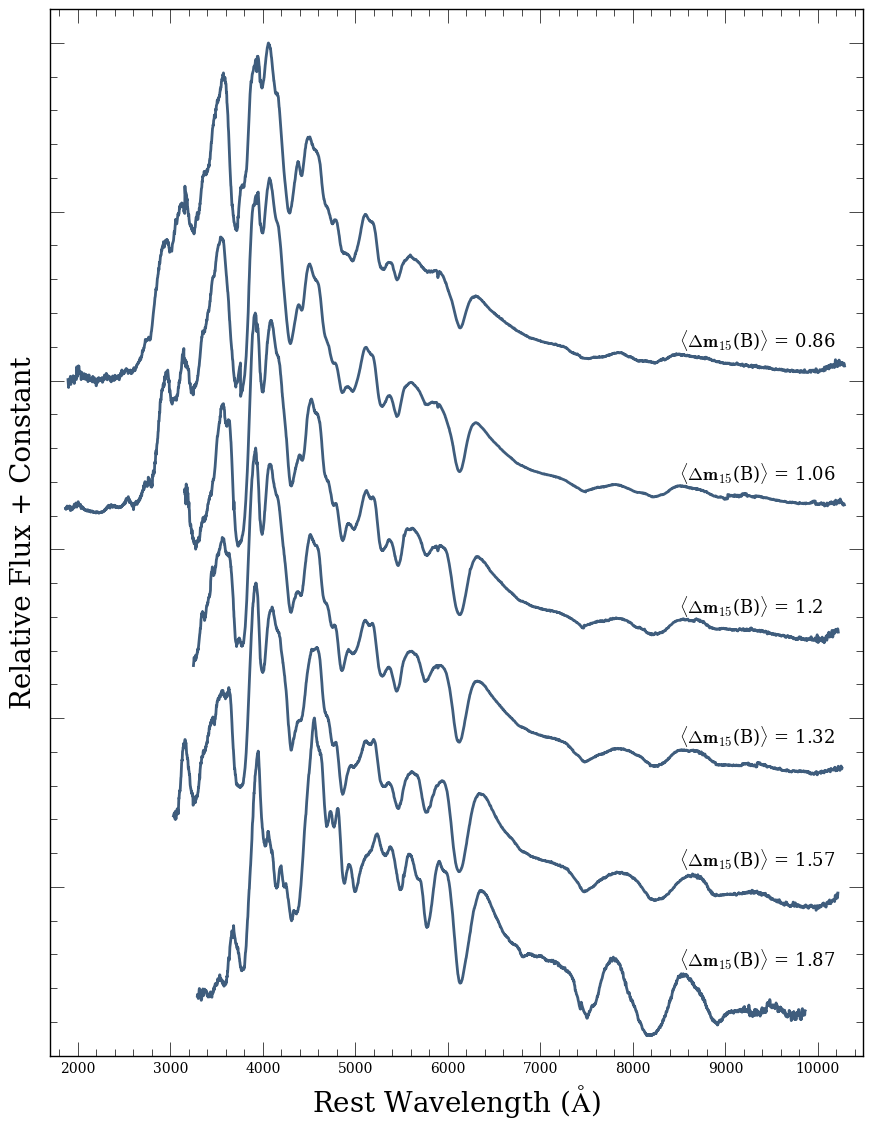

In [13]:
query_db.save_comps_to_files(comps_dm15_max_fewer_bins_mean, 'siebert_max_light_dm15')
query_db.set_min_num_spec(comps_dm15_max_fewer_bins_mean, 5)
query_db.stacked_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/dm15_split_max')
# query_db.stacked_plot(comps_dm15_max_fewer_bins_mean)

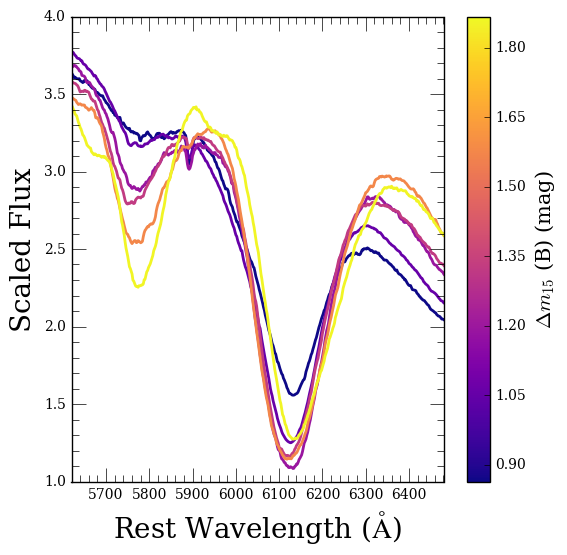

In [14]:
query_db.si_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/si_region')
# query_db.si_plot(comps_dm15_max_fewer_bins_mean)

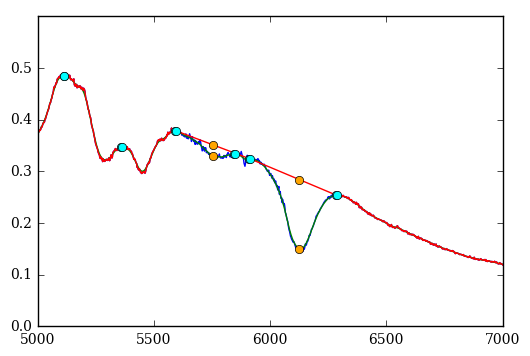

0.89 0.165956899465


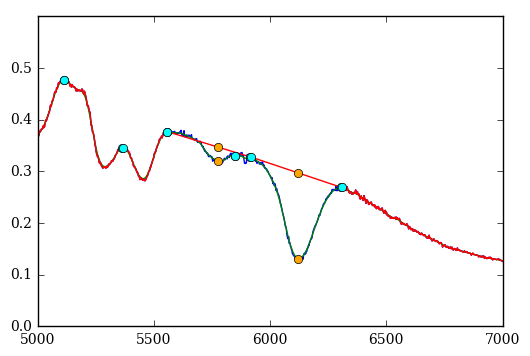

1.07 0.164268475444


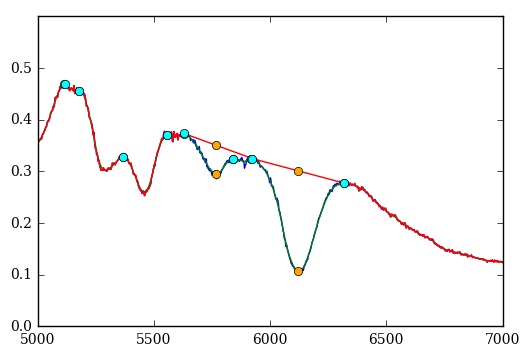

1.2 0.284590608774


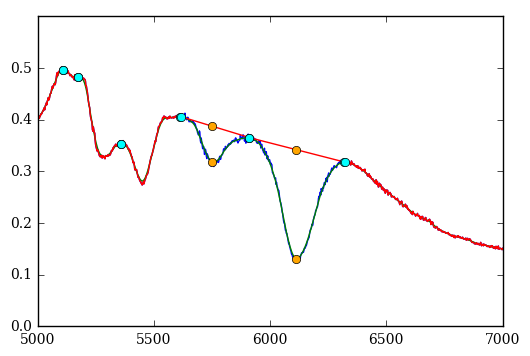

1.3 0.330167939643


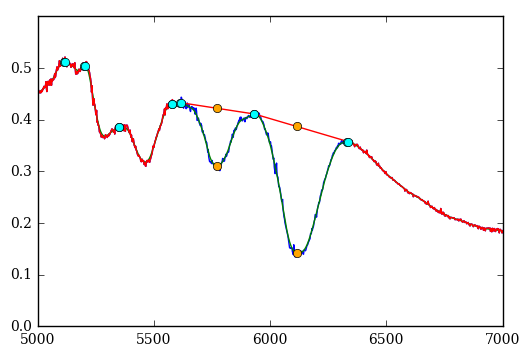

1.56 0.45864541591


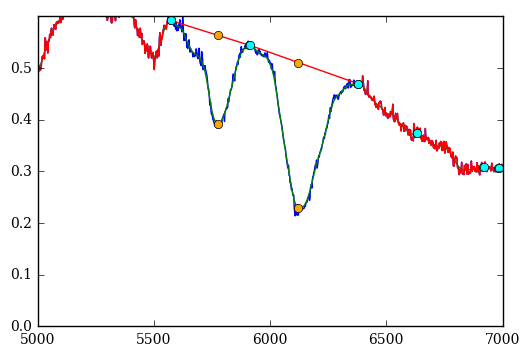

1.88 0.60872948002


In [15]:
si_ratios_med = []
phases_med = []
dm15s_med = []
for comp in comps_dm15_max_fewer_bins_med:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, dm15=dm15)
    print dm15, r
    phases_med.append(p)
    dm15s_med.append(dm15)
    si_ratios_med.append(r)

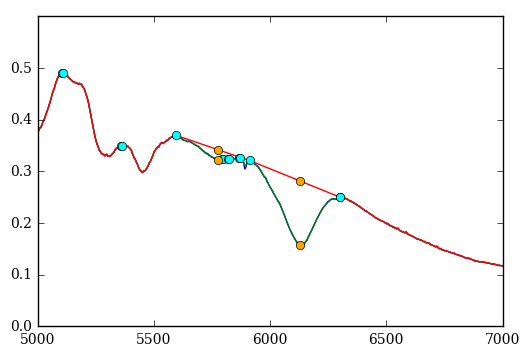

0.86 0.155490443599


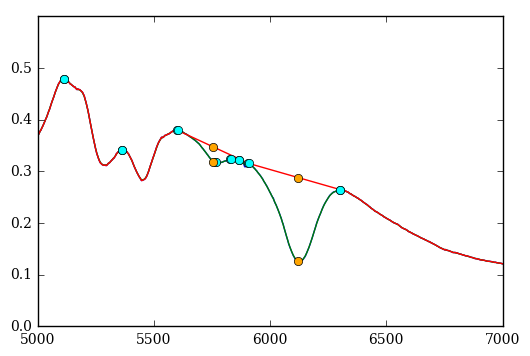

1.06 0.180216858504


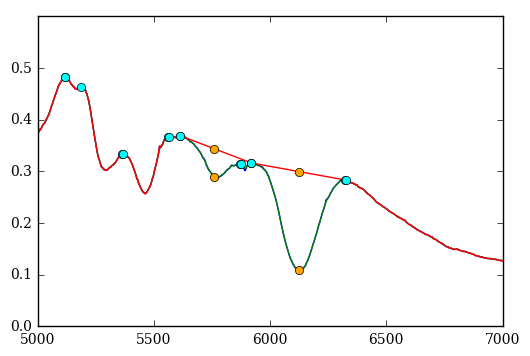

1.2 0.282279003213


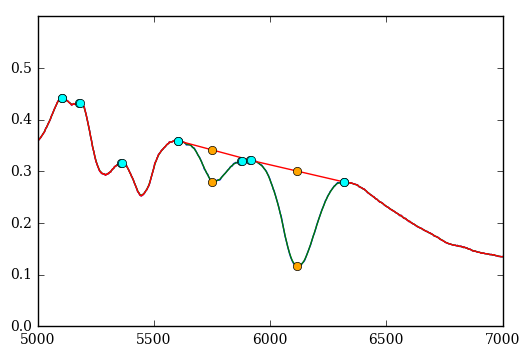

1.32 0.335049860354


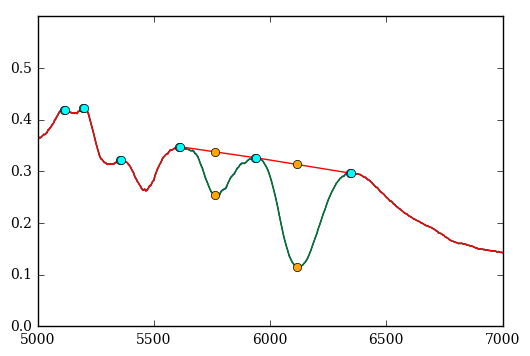

1.57 0.419005991302


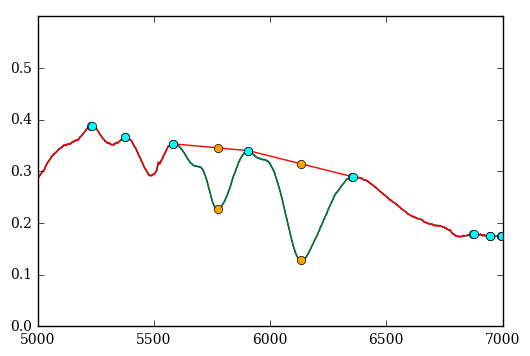

1.87 0.638703083478


In [16]:
si_ratios_mean = []
phases_mean = []
dm15s_mean = []
for comp in comps_dm15_max_fewer_bins_mean:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, dm15=dm15)
    print dm15, r
    phases_mean.append(p)
    dm15s_mean.append(dm15)
    si_ratios_mean.append(r)

In [17]:
boot_ratios_med = []
errors_med  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_med)):
    rs = []
    print k
    for comp in boot_sn_arrays_med[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
    boot_ratios_med.append(rs)

0
1


spectral_analysis.py:69: RuntimeWarning: invalid value encountered in less
  extrema_locs = np.where(abs_deriv < .0001)


Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not 

In [18]:
boot_ratios_mean = []
errors_mean  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_mean)):
    rs = []
    print k
    for comp in boot_sn_arrays_mean[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
        
    boot_ratios_mean.append(rs)

0
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could 

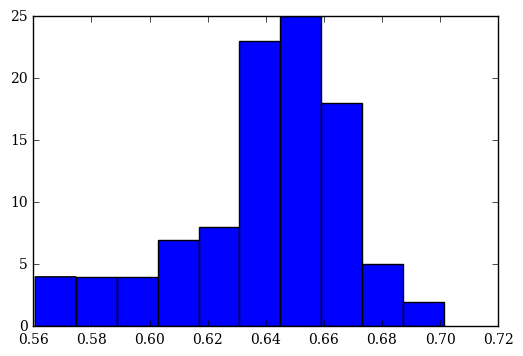

In [19]:
plt.hist(boot_ratios_mean[-1])
plt.show()

In [20]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_med = np.asarray(boot_ratios_med)
for j in range(len(boot_ratios_med)):
    r_resids = []
    r_resids.append(boot_ratios_med[j] - si_ratios_med[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_med = [low_errors, up_errors]

In [21]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_mean = np.asarray(boot_ratios_mean)
for j in range(len(boot_ratios_mean)):
    r_resids = []
    r_resids.append(boot_ratios_mean[j] - si_ratios_mean[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_mean = [low_errors, up_errors]

0
0.161394442965 132774.607394


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in divide


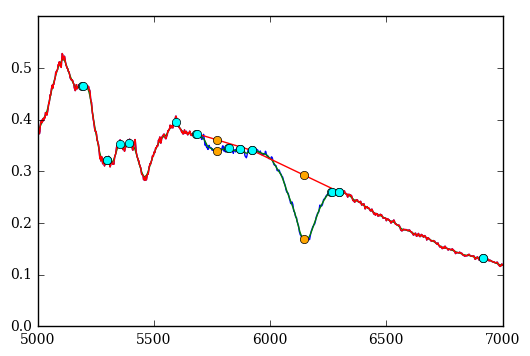

2005eq_combined 0.88 0.18367668791 Check:  0.0015 82.9770829942 80.5570871212
0.19610858763 191684.230053


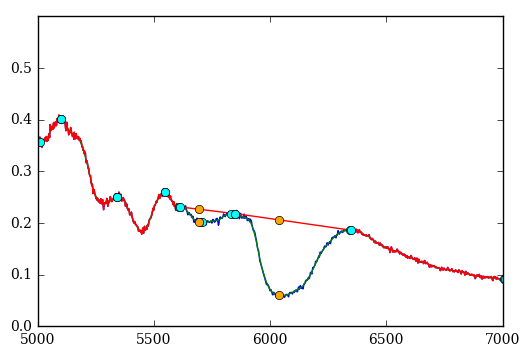

2006ot_combined 0.84 0.166769085164 Check:  0.0015 66.353482166 68.9455989575
0.361498468039 137096.958442


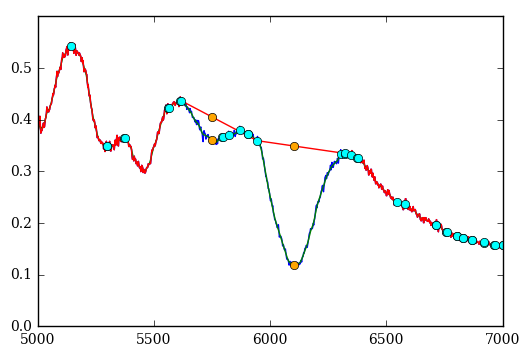

2004as_combined 0.92 0.196672838652 Check:  0.001 123.834397182 128.96248507
0.328821339488 44145.922006


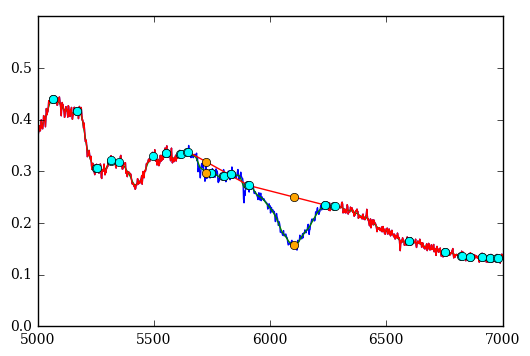

2006gr_combined 0.81 0.239925772624 Check:  0.0015 61.7235932973 67.321929595
0.114784634271 149696.666006


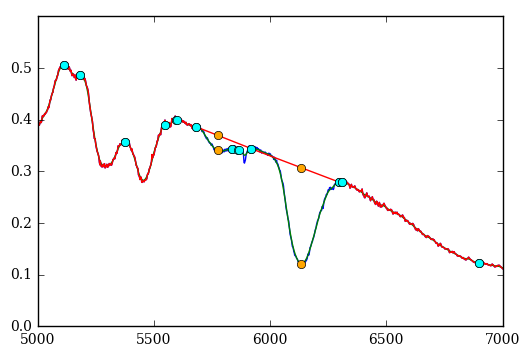

1994s_combined 0.94 0.155456087669 Check:  0.0015 73.1612160106 57.7709844722
0.138708050492 2304798.59004


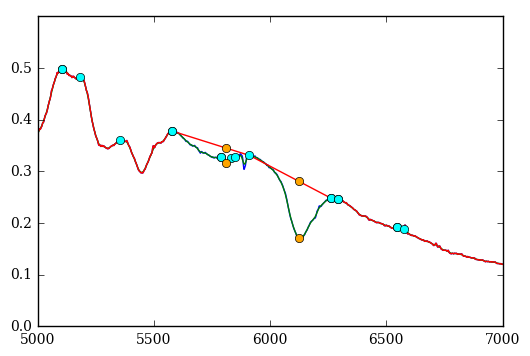

1999dq_combined 0.86 0.2628112237 Check:  0.001 261.656579299 271.858824596
0.370078328846 8446.50364413


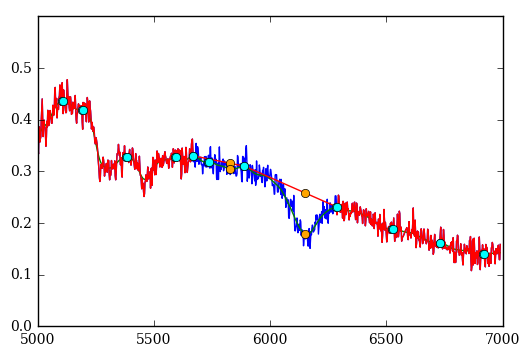

2006oa_combined 0.89 0.142631401029 Check:  0.003 30.9751182027 32.910195362
0.118648358305 313265.475556


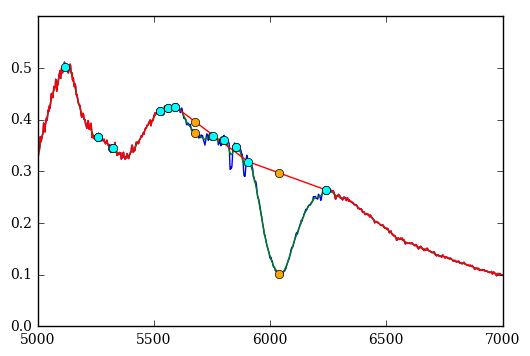

2002cd_combined 0.84 0.111940971176 Check:  0.0015 68.9158527765 58.3107270741
0.143935993318 237722.020753


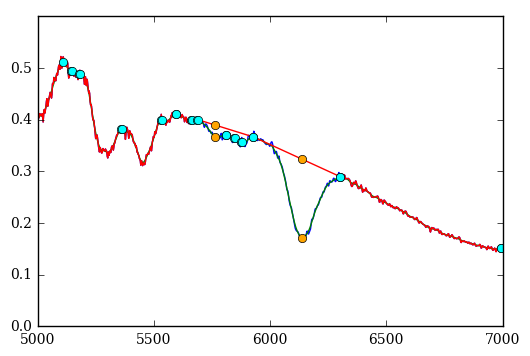

2013dy_combined 0.92 0.150370214294 Check:  0.0015 90.4833576158 79.7286593595
0.170996659755 74659.7886244


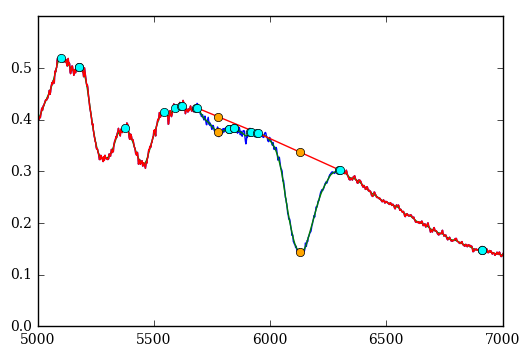

2001cp_combined 0.88 0.152361598751 Check:  0.0015 61.2395604484 55.3310169049
0.159951330056 74347.6548902


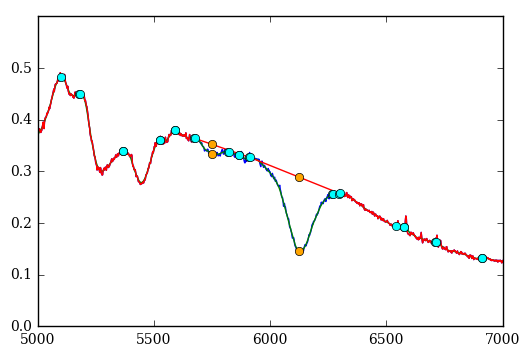

2006s_combined 0.93 0.124519195116 Check:  0.0015 78.8723137047 72.4612954311
0.182386761274 148200.209456


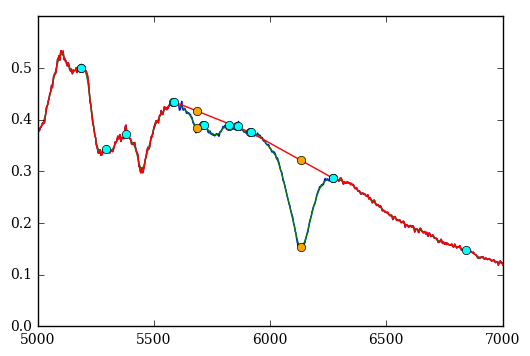

2001eh_combined 0.92 0.197923814956 Check:  0.0015 86.7644450958 84.9285918919
0.0748313026741 5098.88624561
Could not find maximum in a specified range!
1991t_combined 0.898541050009 nan Check:  0.004 15.036492387 10.7499148069
0.303573238183 490625.264872


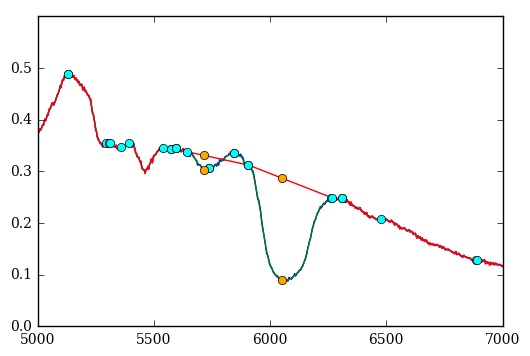

2001ay_combined 0.68 0.139029280671 Check:  0.001 165.63006918 171.916711371
0.383209512282 6668.68364736


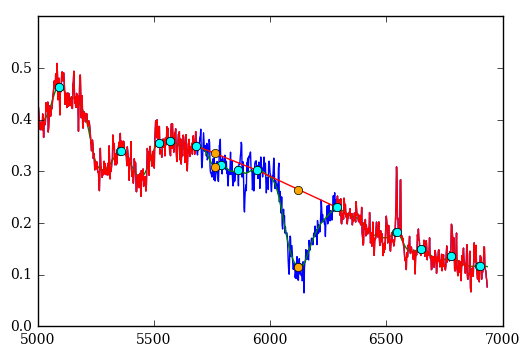

2006cj_combined 0.81 0.173840566485 Check:  0.003 26.5408775797 28.7287714075
0.195461437913 275227.392448


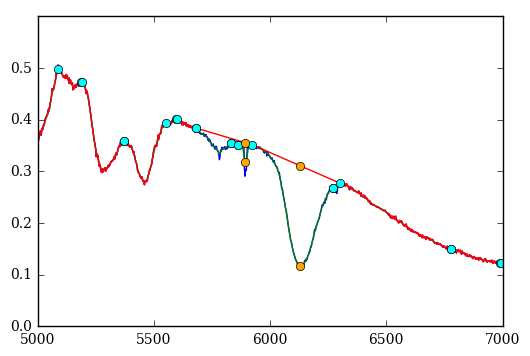

2007ca_combined 0.89 0.196987775742 Check:  0.001 103.384858029 109.205241637
0.16544044576 18438.7370828


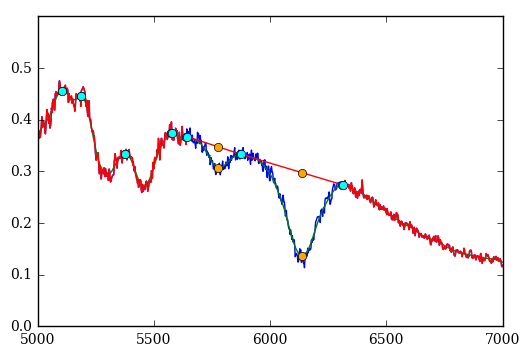

2006cq_combined 0.938834805412 0.25302785694 Check:  0.003 32.5464829937 25.1315476736
0.133634201893 470212.078885


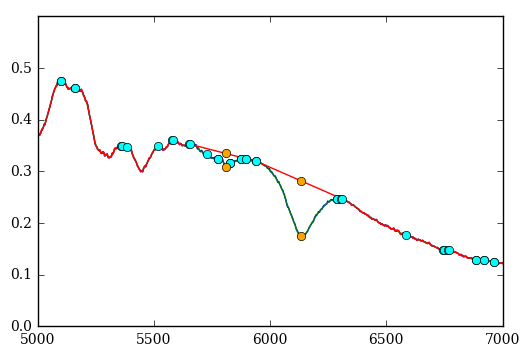

1999aa_combined 0.78 0.246554056406 Check:  0.001 153.248501588 129.681615767
0.162489670459 2239034.07188


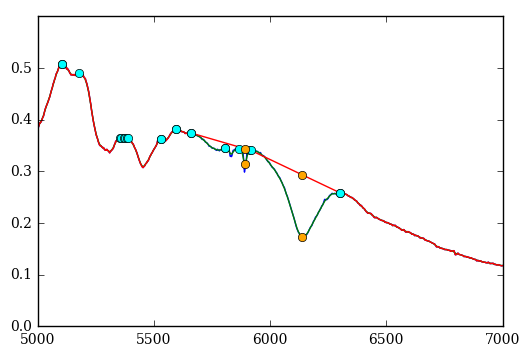

1998es_combined 0.85 0.243927374229 Check:  0.001 296.81369242 292.562620974
0.366030285226 89448.6668736


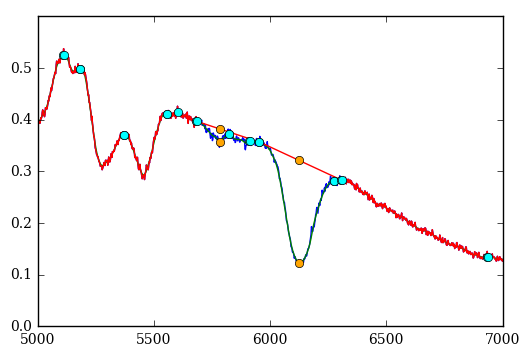

2002jy_combined 0.88 0.126585425461 Check:  0.0015 91.4480027043 99.2488652922
0.375953721154 56173.4303961


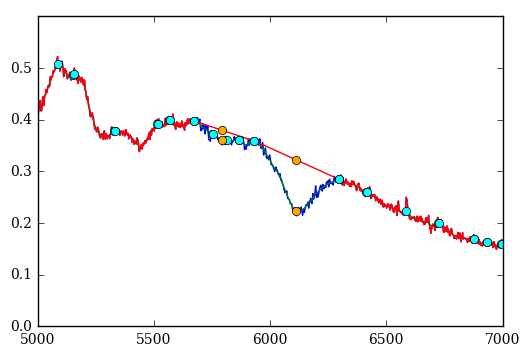

1999gp_combined 0.87 0.195161924729 Check:  0.0015 76.6899175038 80.4532594844
0.197072444778 913578.31768


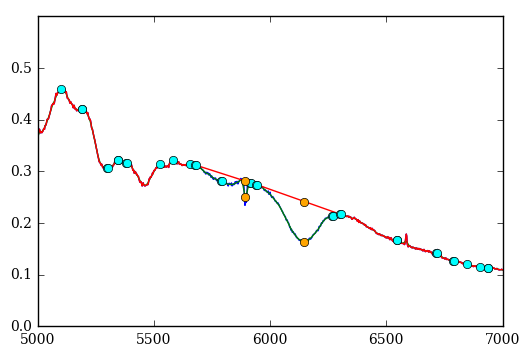

2007s_combined 0.94 0.383825891426 Check:  0.001 170.498354698 194.634917487
0.156150080787 199115.227187


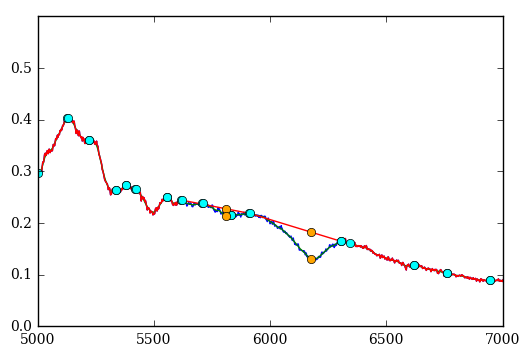

2005m_combined 0.87 0.26854012401 Check:  0.0015 82.7078115353 96.1215230374
0.393395795367 21393.1524502


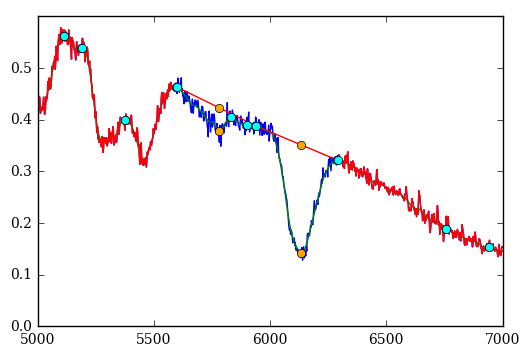

1996c 0.93 0.213546261355 Check:  0.002 49.1010844223 52.462625645
0.348491403128 42873.3758417


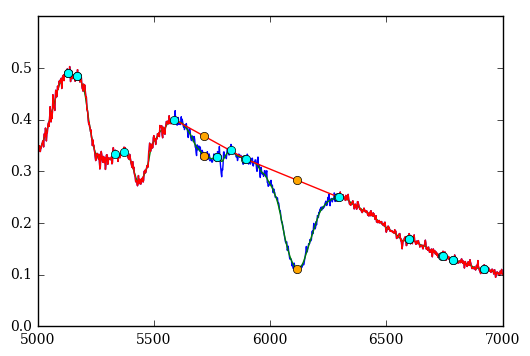

2006le 0.88 0.225461751384 Check:  0.0015 61.5549992848 62.4406048725
0.233667556299 42169.0804277


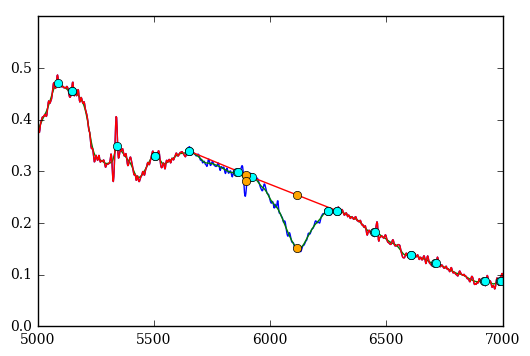

2004gu 0.940148299422 0.126083824454 Check:  0.002 42.1165413687 42.4889979243
0.115369325109 184631.003497


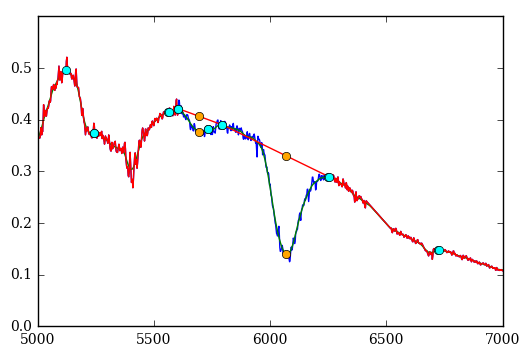

2006is 0.852109516951 0.160491393053 Check:  0.002 54.7193058149 51.6970160574
0.167287959395 26811.4556352


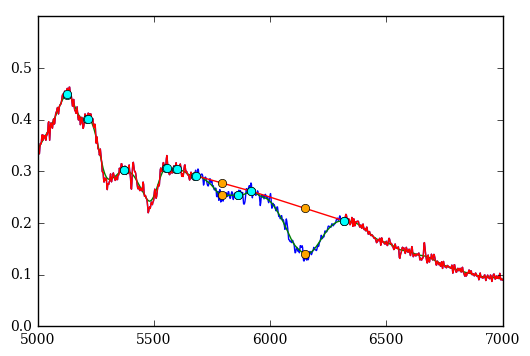

2007ai 0.852109516951 0.272240615869 Check:  0.003 29.4818363321 31.315916639
0.0668320549665 1811.52578704
Could not find maximum in a specified range!
1990n 0.943599627942 nan Check:  0.004 7.30097433101 3.49275407574
1
0.264435019031 5015.38259923


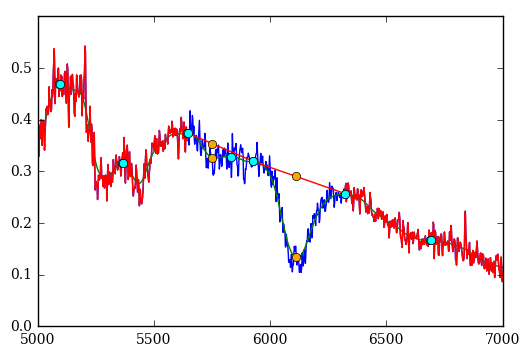

2005ag_combined 1.04651897756 0.175903075008 Check:  0.004 18.1137101254 18.8884044553
0.171941048683 15740816.6952


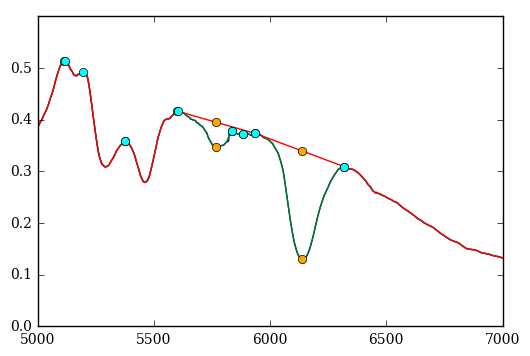

2003du_combined 1.07 0.225390884606 Check:  0.001 1028.78114881 1040.8480714
0.12769860167 3957055.85815


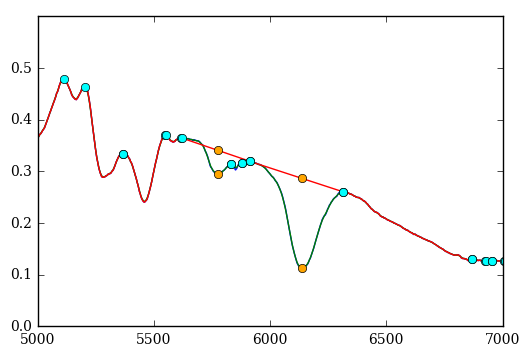

2005cf_combined 1.1 0.269103690289 Check:  0.001 421.550546269 245.984015366
0.352527487737 44721.7553568


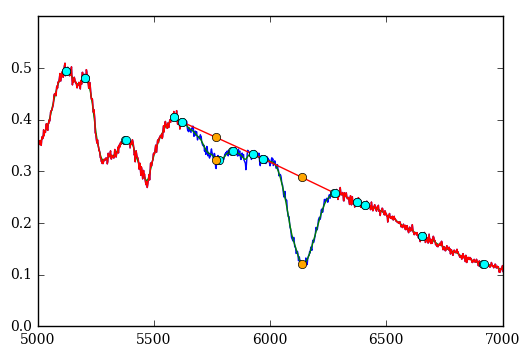

2002ck_combined 1.08 0.260341712767 Check:  0.0015 62.7418816559 67.8232137106
0.320642705401 1591290.66238


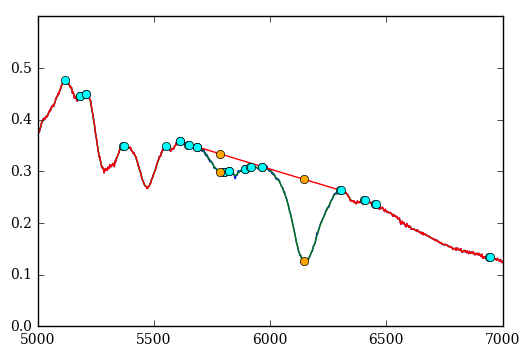

2002fk_combined 1.13 0.226188570464 Check:  0.001 351.595934859 376.388404946
0.318355108565 11006.2223184


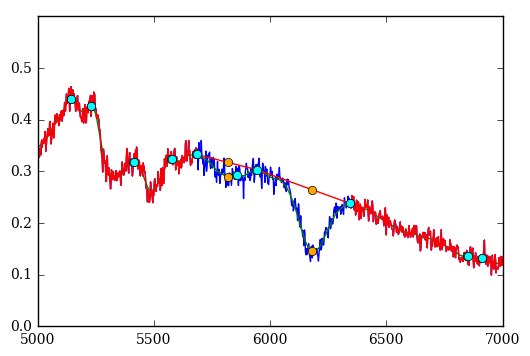

2002hu_combined 1.05 0.237232356466 Check:  0.003 29.1552217045 31.1574357431
0.32367262277 8018305.98523


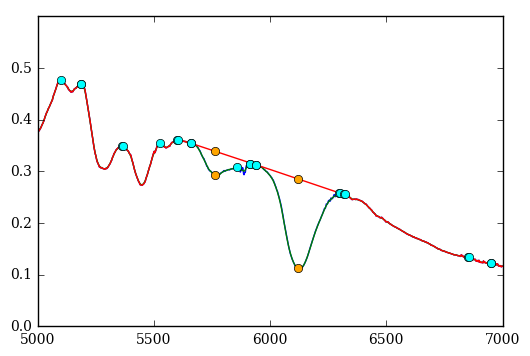

1998bu_combined 1.03 0.268840314897 Check:  0.001 759.388305147 807.557564537
0.135451070322 1689677.61215


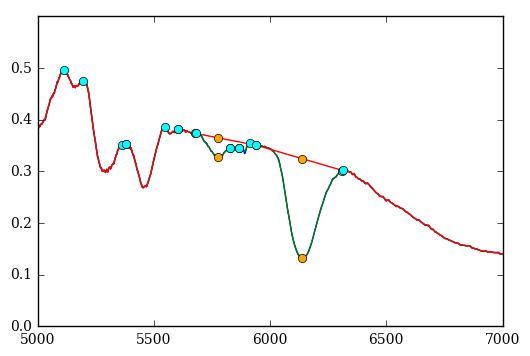

2011by_combined 1.14 0.193236926739 Check:  0.001 275.887502952 248.651926249
0.137367402694 6124015.25189


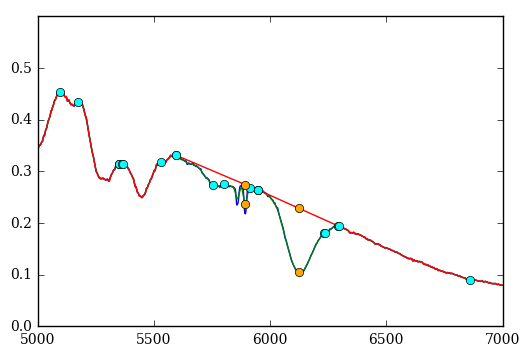

2008fp_combined 0.979300806419 0.308474531356 Check:  0.001 232.116312479 223.077481687
0.136328285012 49715.6584355


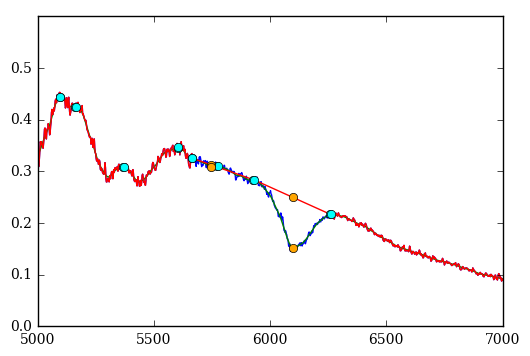

2006cz_combined 1.03427180785 0.0426071337887 Check:  0.002 41.9571167424 35.9368644889
0.229585236002 894312.861645


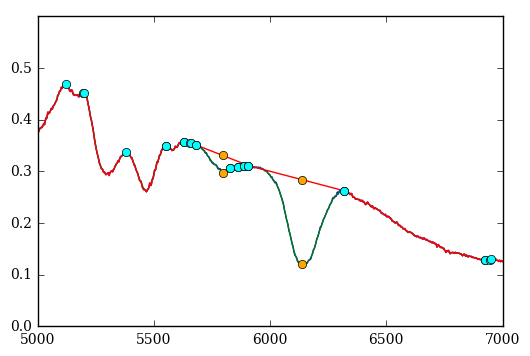

2006ax_combined 1.06 0.204768142941 Check:  0.001 190.330555416 201.357328832
0.148903919108 38537.3836123


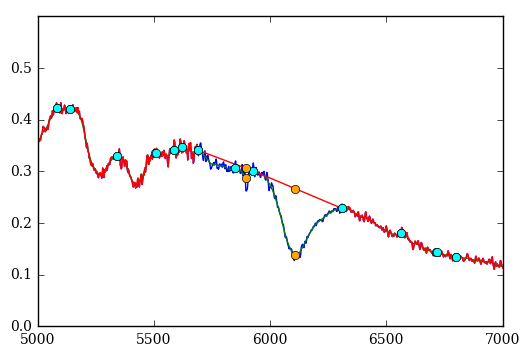

2001az_combined 1.09 0.141616315594 Check:  0.002 40.3639052735 40.8783651431
0.30791171579 216934.770831


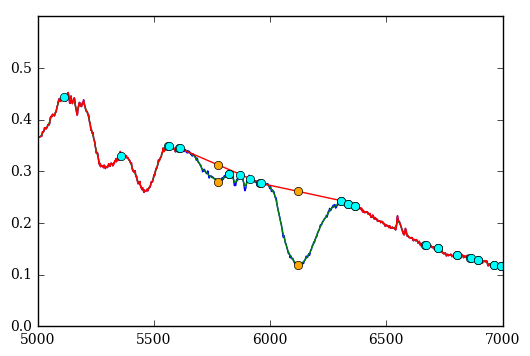

1997dt_combined 1.04 0.2340203153 Check:  0.001 120.477382764 123.236731598
0.380608640412 2978.64413998


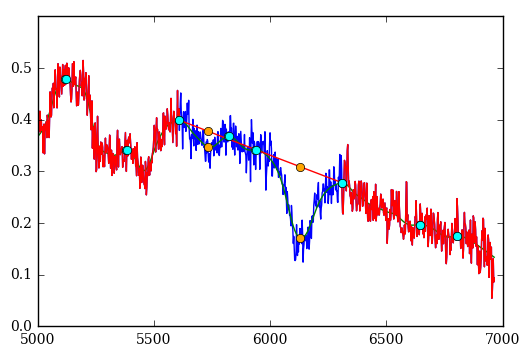

2007ae_combined 0.98 0.225435726636 Check:  0.004 18.3354216176 19.7153659195
0.134127110242 7977702.96524


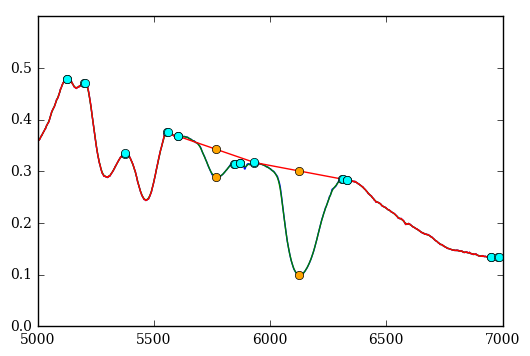

2007af_combined 1.04 0.261347355671 Check:  0.001 492.599125135 411.453495672
0.221831963095 1123720.95946


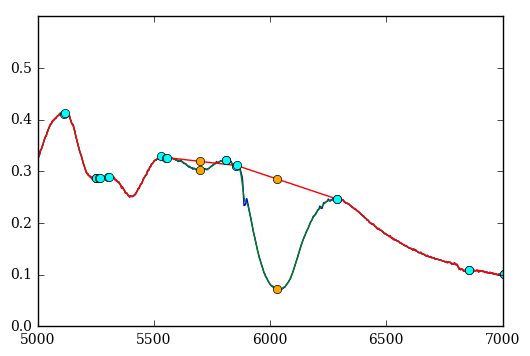

1997bp_combined 1.08 0.0786279490375 Check:  0.001 194.447042831 202.469284487
0.128166452548 33080798.6079


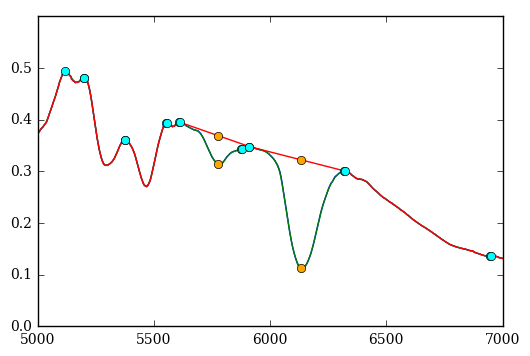

2011fe_combined 1.108 0.262517759871 Check:  0.001 1484.03080379 1693.91630793
0.124534702316 115513.781873


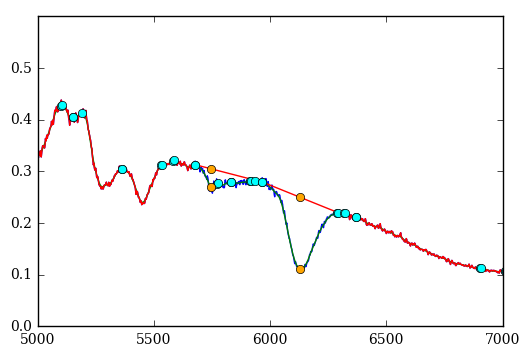

2005na_combined 1.09 0.25820517376 Check:  0.0015 63.1971277459 59.8210973462
0.346842927375 44782.4748751


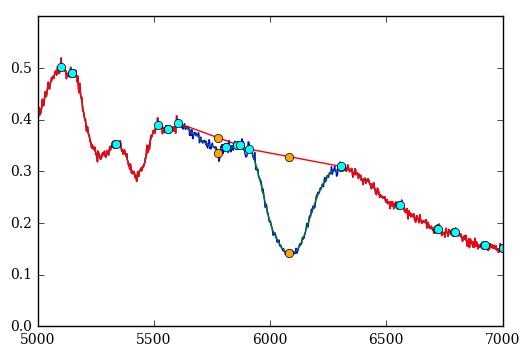

1998ec_combined 1.08 0.153935484386 Check:  0.0015 62.1969703345 65.8603268193
0.254894107195 8934602.76037


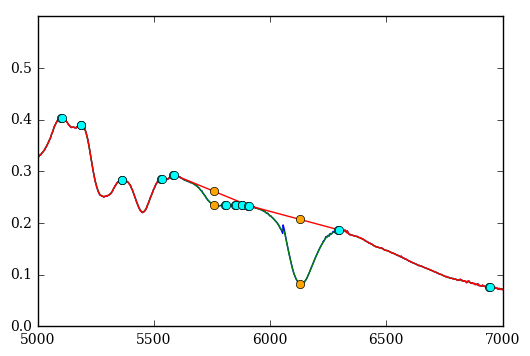

1998aq_combined 1.11 0.216019139482 Check:  0.001 642.377420122 723.628063808
0.167653454925 2862742.35411


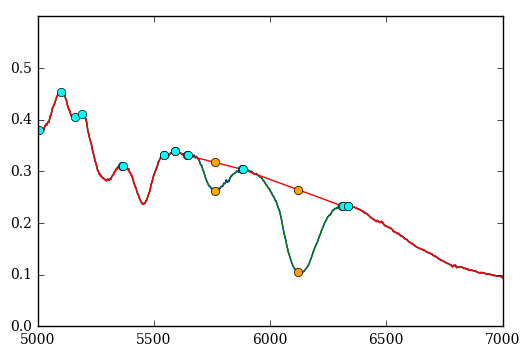

2008hv_combined 1.13369017264 0.344968908839 Check:  0.001 217.985768122 207.016218145
0.214019726991 22653.6971848


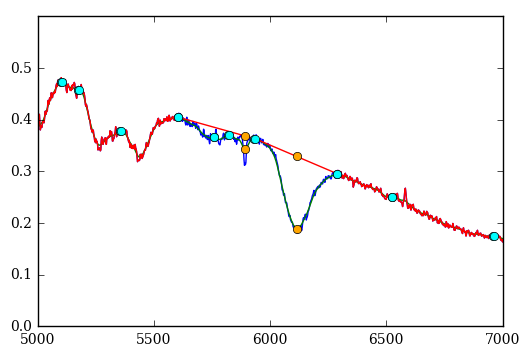

2002de_combined 0.96 0.186499712595 Check:  0.002 53.5077972483 37.5413270572
0.0419863738076 1604.00020949
Could not find maximum in a specified range!
1980n_combined 1.13157052606 nan Check:  0.0045 4.28813786077 2.23424826797
0.1165320843 14540062.686


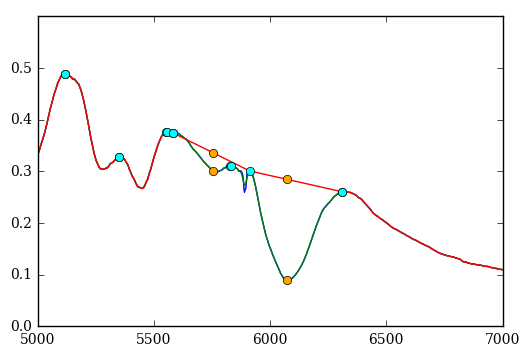

2002bo_combined 1.08 0.176546540299 Check:  0.001 517.193331065 530.535977171
0.0744885027776 2093.55395877
Could not find maximum in a specified range!
1981b_combined 1.05664955847 nan Check:  0.004 5.66189717658 5.01594484113
0.411093777725 29879.8303854


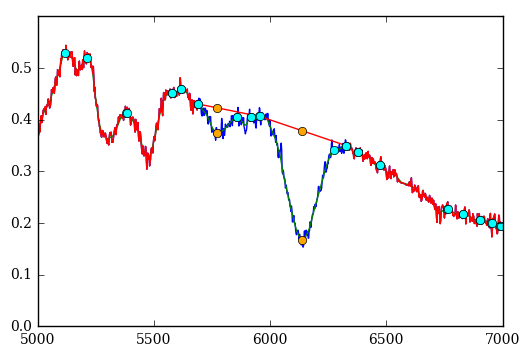

2006cf_combined 1.08357495977 0.232001687094 Check:  0.0015 65.2089852334 70.5999422687
0.306801906169 2179003.07751


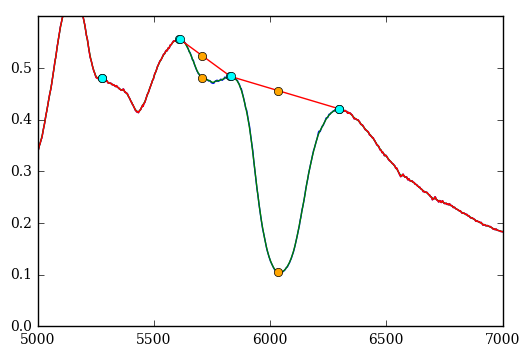

2002bf_combined 1.12 0.120995338612 Check:  0.001 408.922357984 393.142721383
0.188746717227 1997036.57038


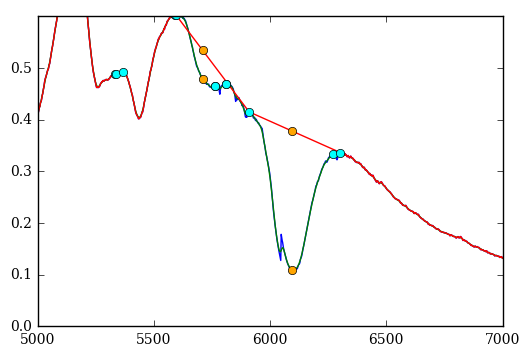

2007le_combined 1.01 0.208379465781 Check:  0.001 328.216702076 310.983206341
0.402956335637 23765.2703531


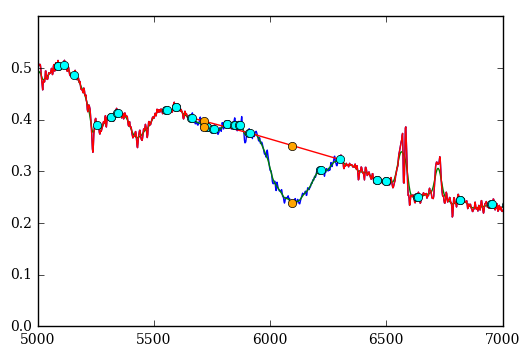

2005ku_combined 1.03987320294 0.103877034026 Check:  0.0015 63.6167707785 68.1389404932
0.174191186298 807754.90823


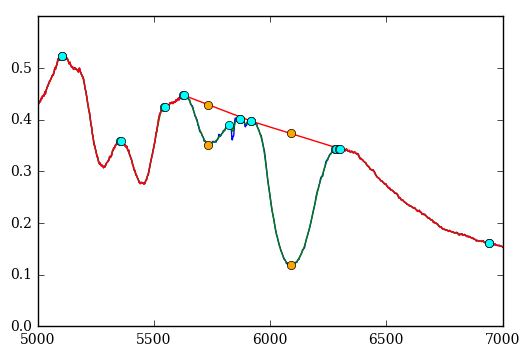

2004fu_combined 1.08 0.305428308329 Check:  0.001 203.882631303 217.210725306
0.162581098444 421748.444907


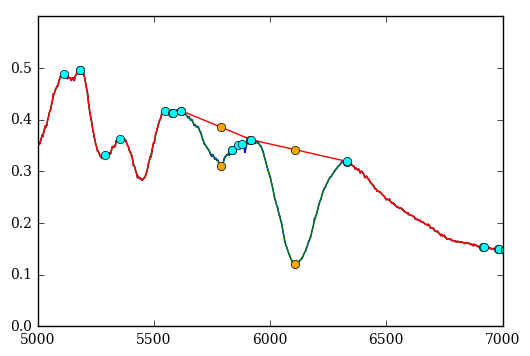

2001da_combined 1.12 0.342271284301 Check:  0.001 160.632846797 168.06295289
0.372796335973 1683468.16677


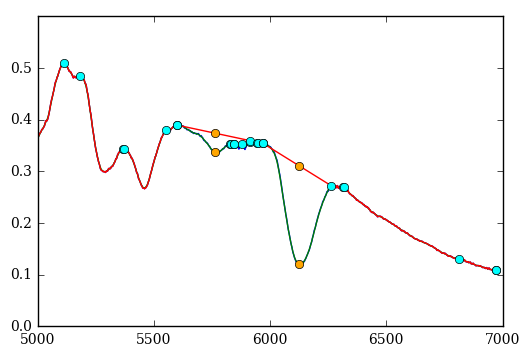

1994ae_combined 0.96 0.190308301425 Check:  0.001 413.474782476 452.161912559
0.137031600612 1299436.82222


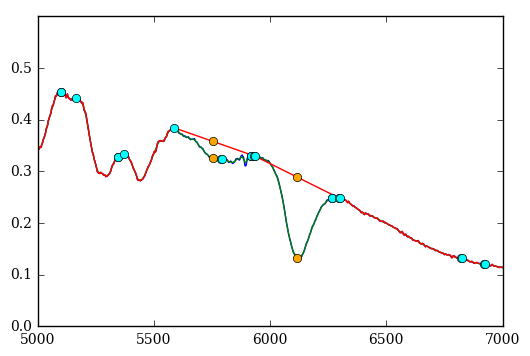

2001fe_combined 1.0 0.210591857209 Check:  0.001 202.953239548 187.580096755
0.355390167922 41283.6633668


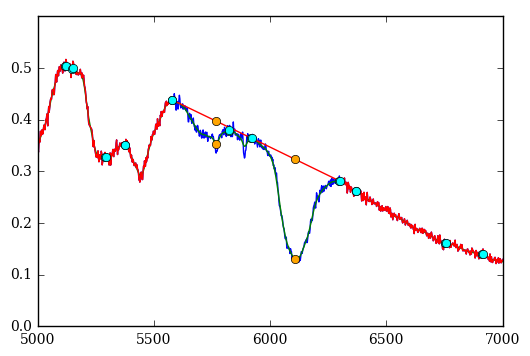

2000fa_combined 1.0 0.230912027893 Check:  0.0015 60.3070413876 64.4506237932
0.371742246335 112019.159735


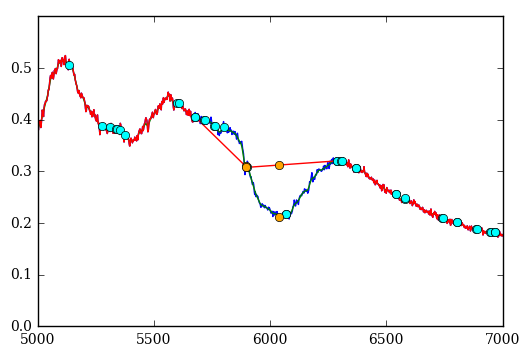

2003w_combined 1.14 0.0196624847636 Check:  0.001 105.761857671 104.41399035
0.150030034166 237480.645992


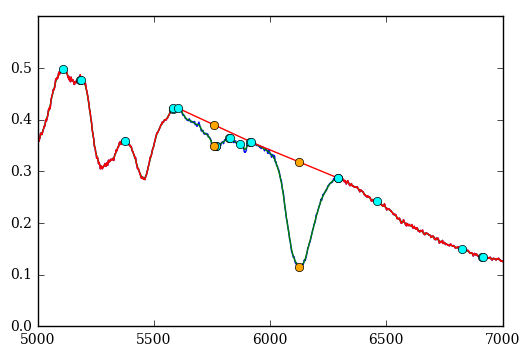

2007f_combined 0.96 0.203798368735 Check:  0.001 106.577575902 91.6508949049
0.160041388863 1124813.64594


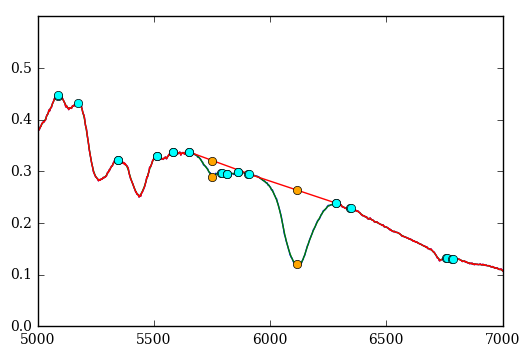

2008bf_combined 1.05 0.22276117738 Check:  0.001 191.345452033 144.094441291
0.341590678321 97028.4063414


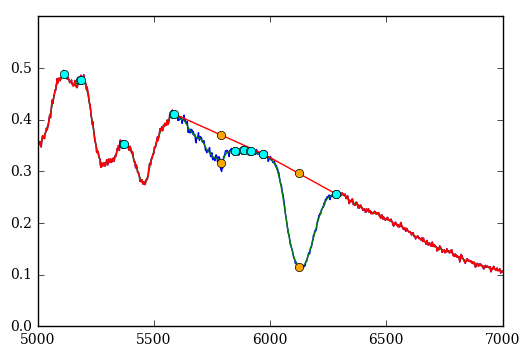

1998v_combined 0.99 0.298353581449 Check:  0.0015 89.8186272833 95.6527604015
0.122276275429 636983.854483


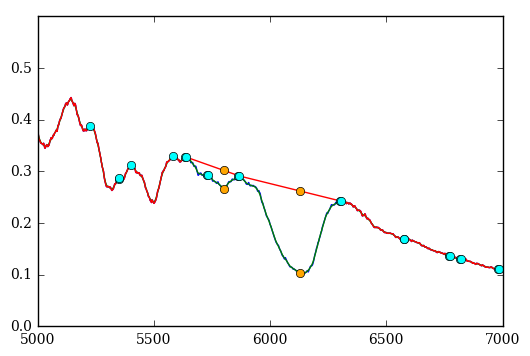

2001bf_combined 0.99 0.221507839524 Check:  0.001 117.251293531 107.056599698
0.325709207932 41778.6992334


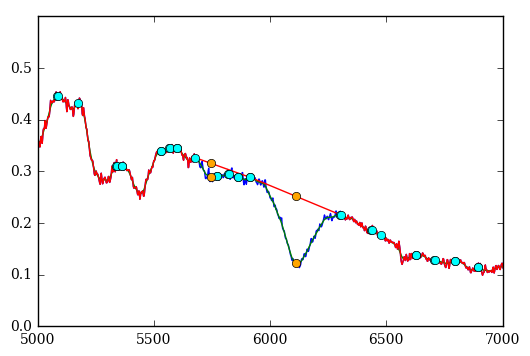

2005hc_combined 1.03 0.21111660955 Check:  0.0015 60.0090181287 61.694436493
0.142804013254 736949.143905


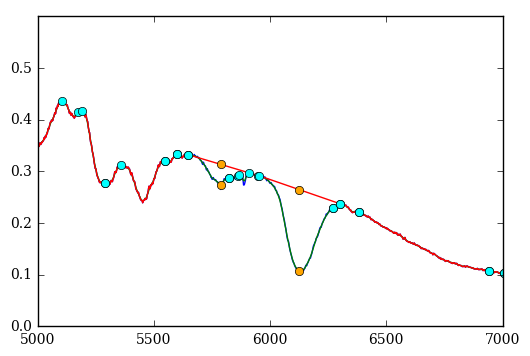

2007a_combined 0.95 0.255115072349 Check:  0.001 156.450716243 163.142106666
0.153262057883 2062783.67065


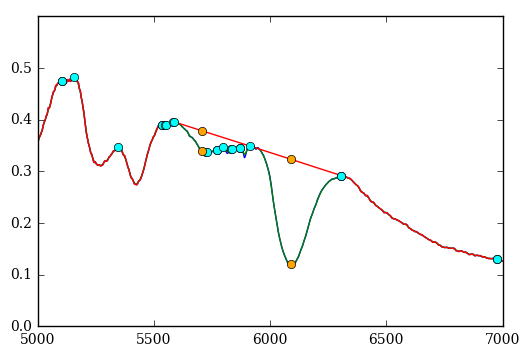

1998dk 1.05 0.193172187492 Check:  0.001 269.472964709 225.833313606
0.155628484158 16770.8904231


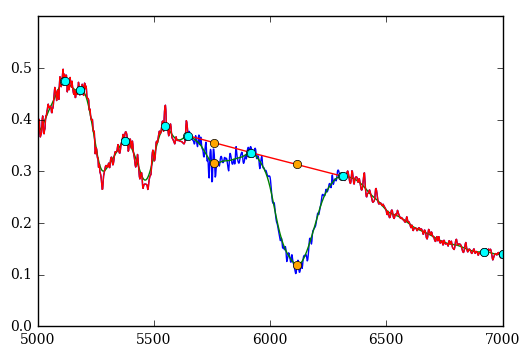

2005ms 1.02142208206 0.204910420521 Check:  0.003 29.9997470927 27.7512572086
0.161617808504 39763.0533124
Could not find maximum in a specified range!
2006or 1.06267601692 nan Check:  0.003 37.2200959331 32.770383588
0.160539632089 47846.684893


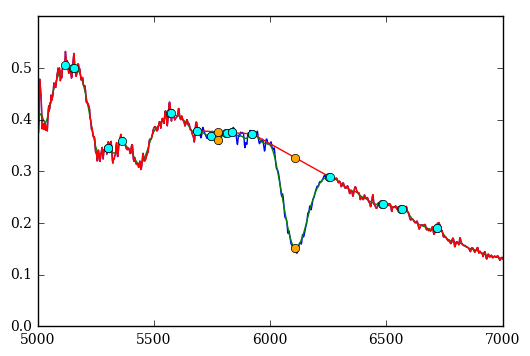

2007bz 1.05 0.0844775724779 Check:  0.002 41.9339199169 40.7215753614
0.152950043983 649900.189395


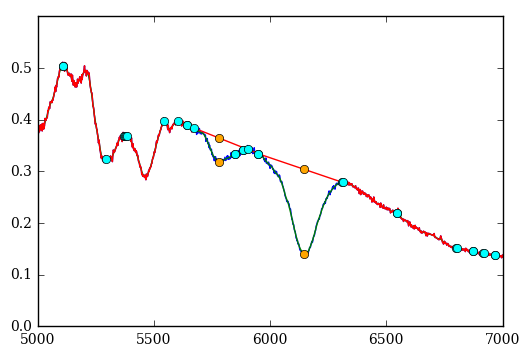

2007o 1.13613975141 0.28716895626 Check:  0.001 126.929950834 122.09537492
0.374160173972 336593.871545


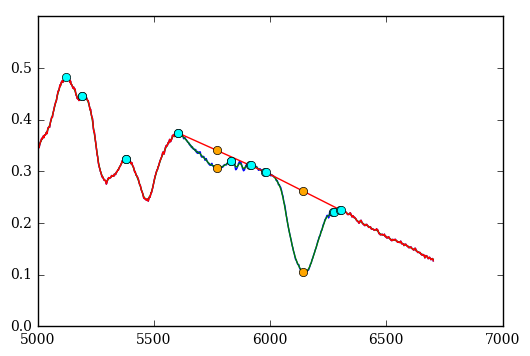

1995d 1.05 0.218824801497 Check:  0.001 196.550487707 208.749794319
0.415307757325 646.209323655


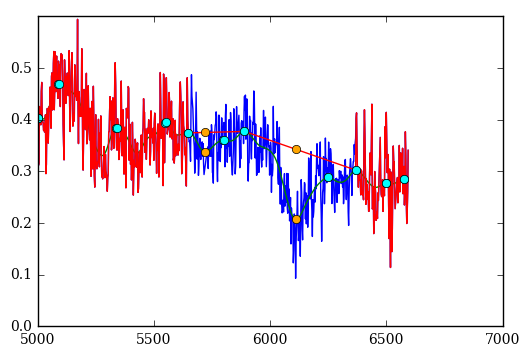

1996ab 1.01 0.277705646996 Check:  0.004 9.88474485181 10.2248512023
0.367949165924 13364.0738211


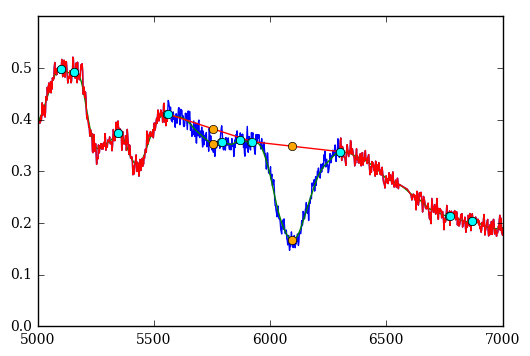

1996bl 1.07 0.1647591821 Check:  0.003 36.8294304067 37.4449261727
0.343490494416 35362.197505


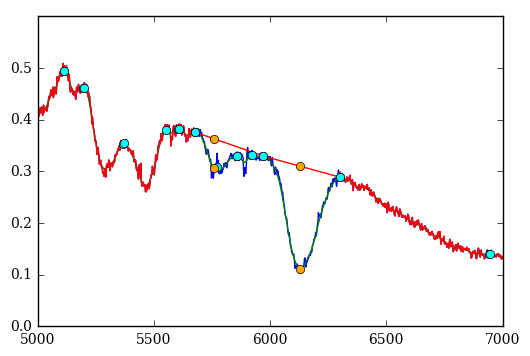

1998eg 1.14 0.280708200898 Check:  0.002 57.4152030737 61.3341157587
0.368985654325 10296.430201


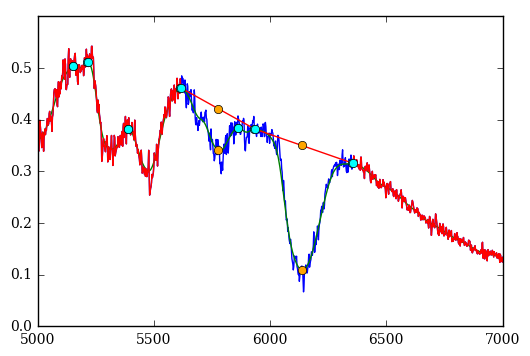

1999ek 1.14 0.331686084572 Check:  0.003 30.8786148047 30.75559081
0.375452601484 72281.9618479


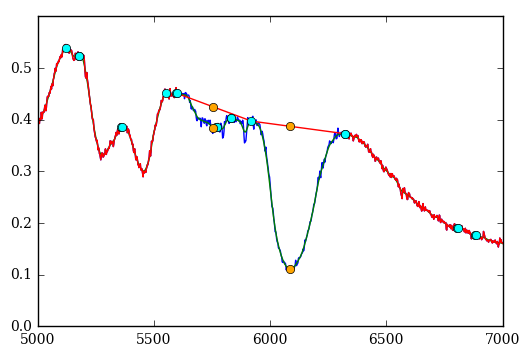

2001en 1.12 0.145045970242 Check:  0.0015 87.0916810669 91.9202350873
0.362765910382 48091.5223855


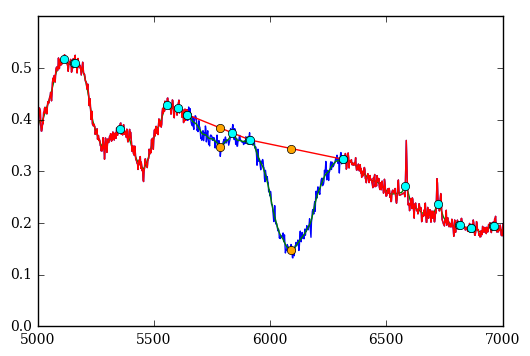

2003kc 1.14019986122 0.183528336837 Check:  0.0015 74.2623089089 76.5643723896
0.327612039822 439104.681857


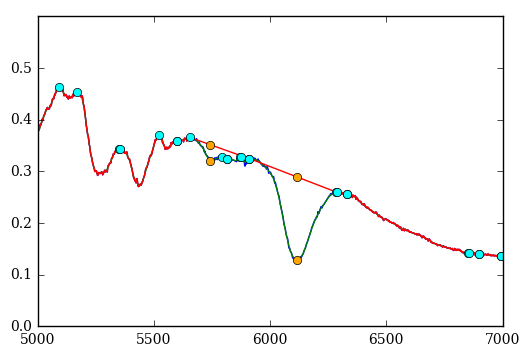

2003kf 1.1 0.20087307224 Check:  0.001 193.001793017 193.606063601
0.340717720158 17649.384775


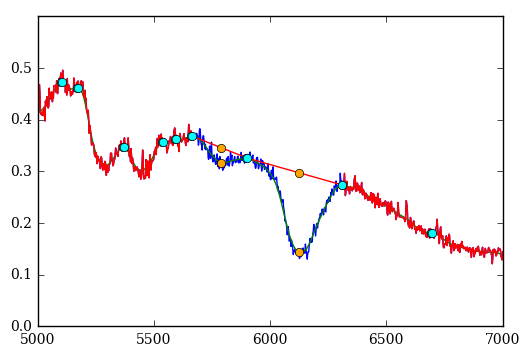

2004bg 1.05 0.193190958245 Check:  0.003 39.4603496405 42.0932504084
0.320230787188 41669.9776683


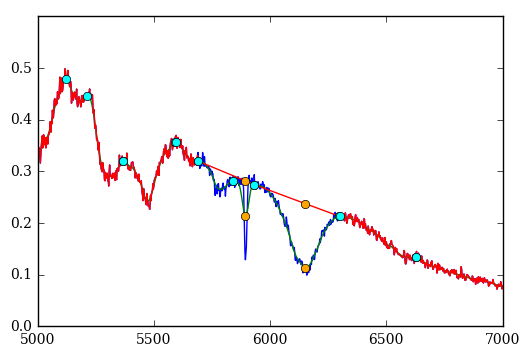

2006et 1.02 0.550131831394 Check:  0.002 56.6172060391 61.2158469628
0.236357806142 25068.8752934


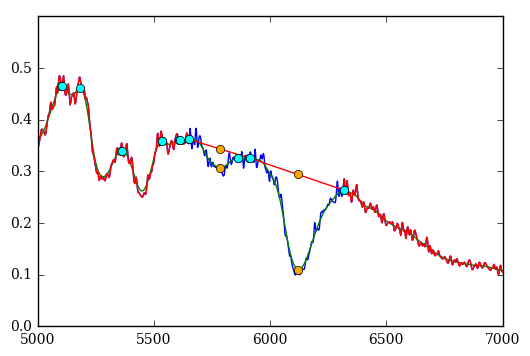

2004ey 1.00821961936 0.202318851961 Check:  0.003 32.2443438422 35.6110499029
0.210396195151 102700.560734


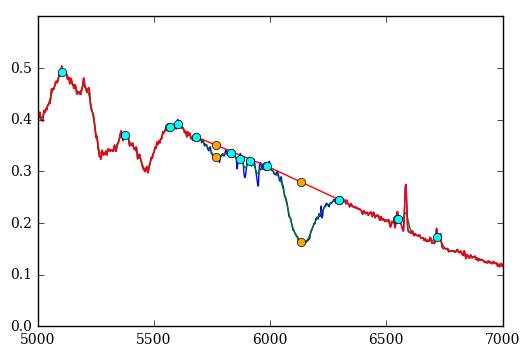

2005bg 1.06633511992 0.207721687147 Check:  0.0015 66.0724133564 61.5188801541
0.302559664582 13076.9563231


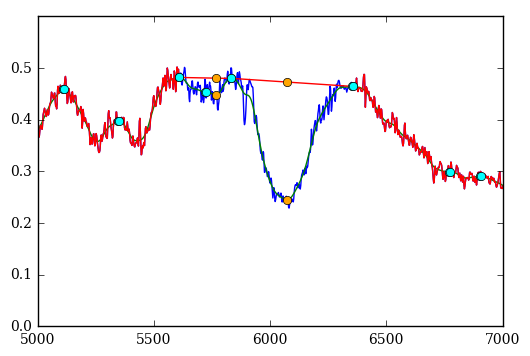

2006br 1.12 0.146608890286 Check:  0.003 35.690384009 35.4601136671
0.317440653398 14392.8382599


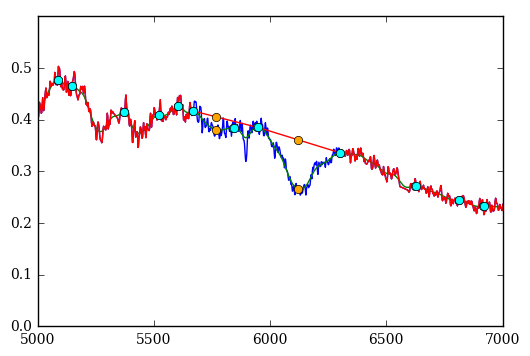

2006hx 1.05273249926 0.275742297377 Check:  0.003 37.2248703219 40.6443484778
0.148835503091 28752.0044411


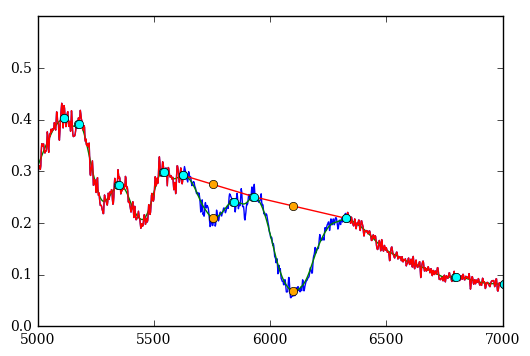

2006os 1.07098749844 0.395008240952 Check:  0.003 20.1474155996 20.9915750298
0.208944883062 73571.7617674


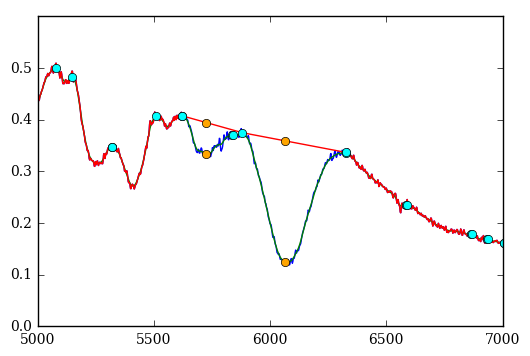

2007as 1.11396538206 0.2630879477 Check:  0.0015 65.5316811215 70.8910937336
0.204472651226 98365.8508815


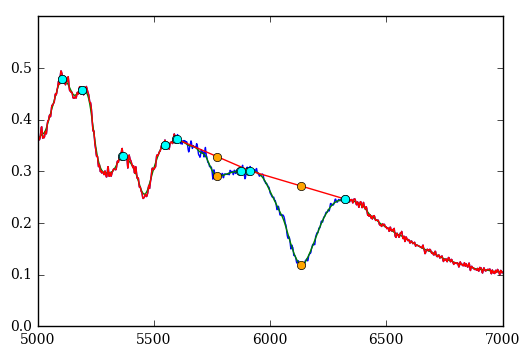

2008bq 1.00130644601 0.246973225425 Check:  0.002 55.9979369384 59.4741697838
0.483403238221 55008.4694917
Could not find maximum in a specified range!
2001ba 1.03352873666 nan Check:  0.001 124.755430238 119.958294489
0.418824300517 131426.44479
Could not find maximum in a specified range!
2012cg 1.039 nan Check:  0.001 153.451909226 163.417632742
2
0.113375133109 634039.066369


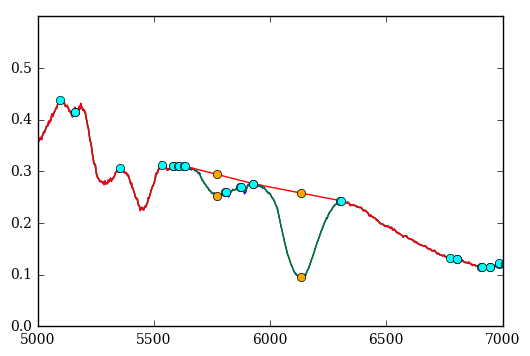

1995e_combined 1.16 0.258029786579 Check:  0.001 110.423358507 99.1699157915
0.153374430717 3790204.52139


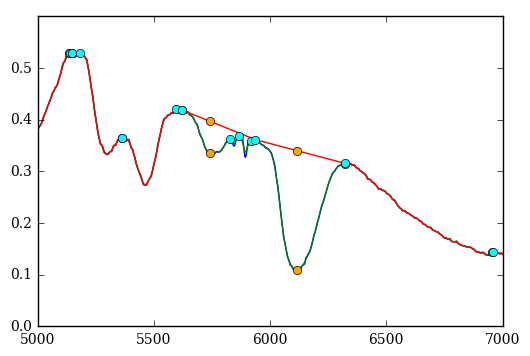

2002er_combined 1.23 0.267265846447 Check:  0.001 468.805813245 427.796113132
0.162688327314 24939.1356411


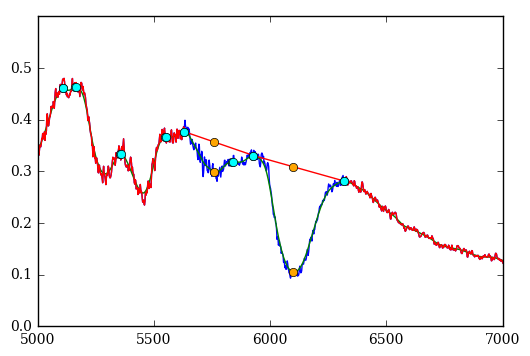

2003cq_combined 1.2 0.281491766385 Check:  0.003 35.300446025 29.7421174707
0.31487119469 66576.5337702


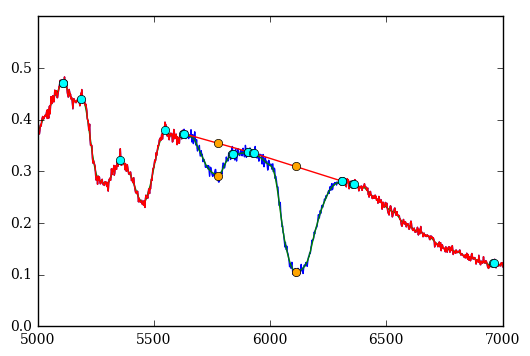

2002kf_combined 1.2 0.313793651965 Check:  0.0015 70.1725659335 76.2131661267
0.264527843537 628768.780726


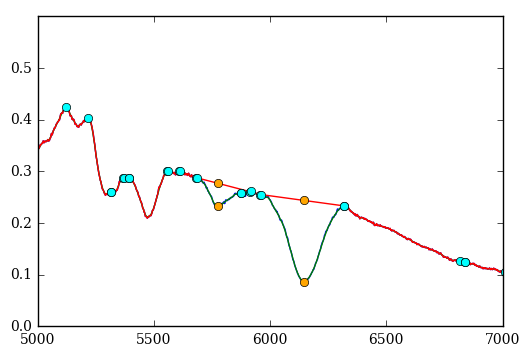

2002cr_combined 1.19 0.2851145999 Check:  0.001 189.864648751 202.706369455
0.13584712388 2537440.25228


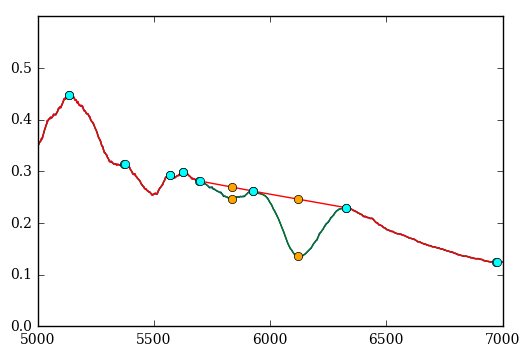

1999ac_combined 1.23 0.213164276532 Check:  0.001 331.266906479 363.849802382
0.138849795691 753454.284275


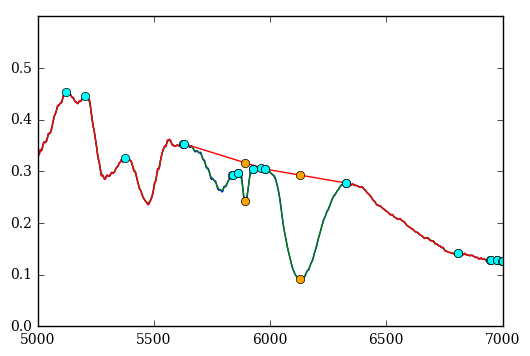

1999gd_combined 1.18 0.362706944916 Check:  0.001 157.106729055 151.314099797
0.225750753766 30536.8793221


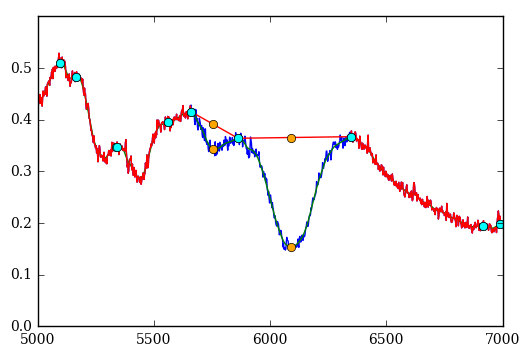

2007jg_combined 1.17 0.226041386621 Check:  0.002 50.2499588446 55.0317328441
0.28404255399 118716.096245


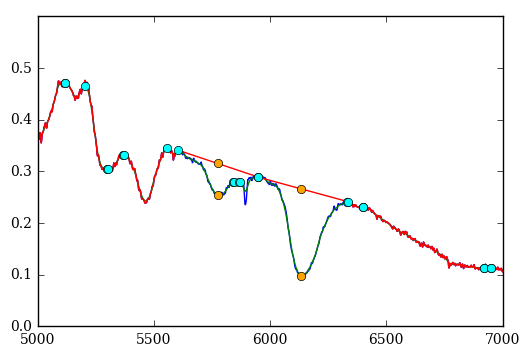

2005kc_combined 1.24 0.357841780187 Check:  0.0015 89.1346392066 95.3004459558
0.297663725657 348794.476457


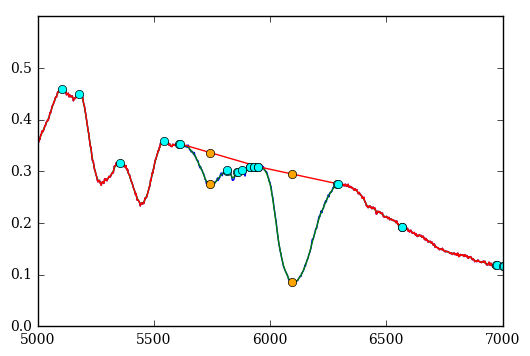

1998dh_combined 1.17 0.287266701694 Check:  0.001 153.314890818 163.908533391
0.133538663936 329370.922874


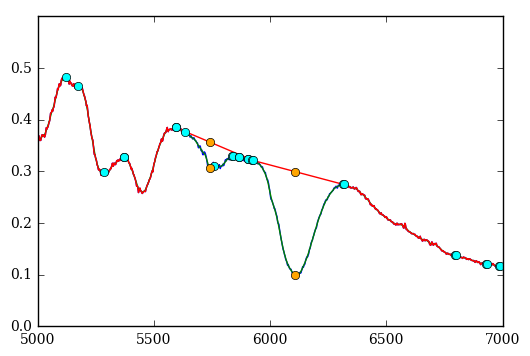

2007co_combined 1.16 0.248700429204 Check:  0.001 107.12750837 84.4802616381
0.20929388501 171888.338285


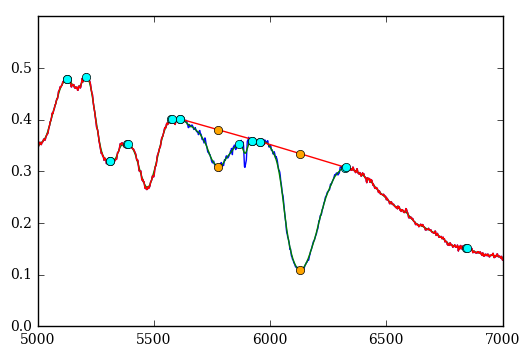

1997y_combined 1.15 0.319641982797 Check:  0.0015 95.7223293823 90.8522105117
0.180599974102 691322.93599


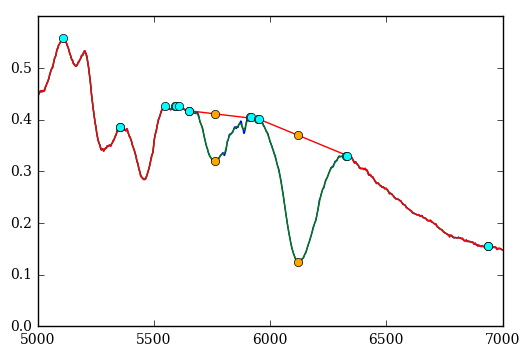

2002ha_combined 1.22 0.369844098382 Check:  0.001 215.848461095 204.977463736
0.316674985891 36722.1642045


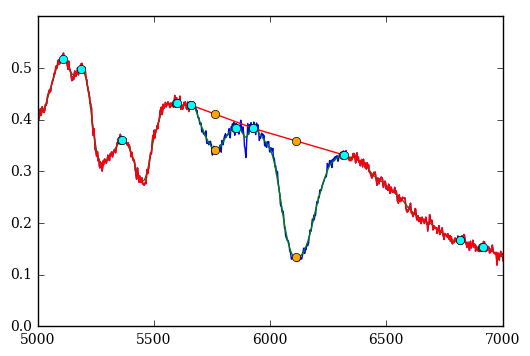

2003ch_combined 1.22 0.306877476677 Check:  0.002 57.6412432364 54.1373791634
0.162018156805 399917.045432


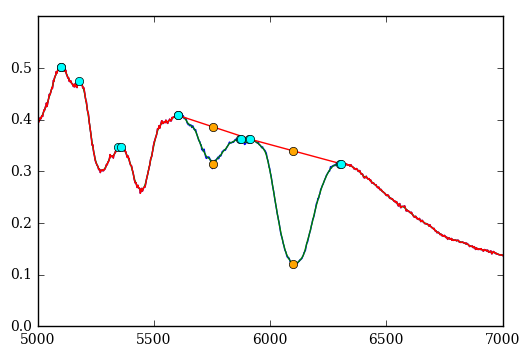

2006sr_combined 1.24 0.328776356449 Check:  0.001 141.336203604 120.684917814
0.0784907380222 1025.15432589


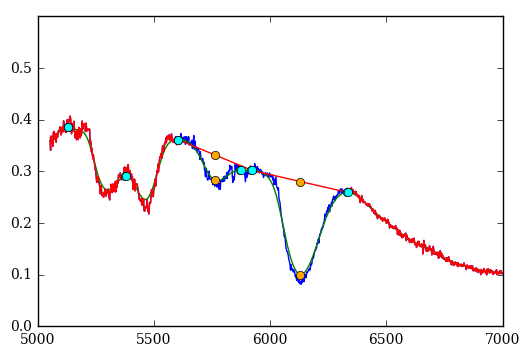

2005w 1.22957865079 0.269455208239 Check:  0.0045 3.55052155664 2.6092297517
0.331933107464 16230.478955


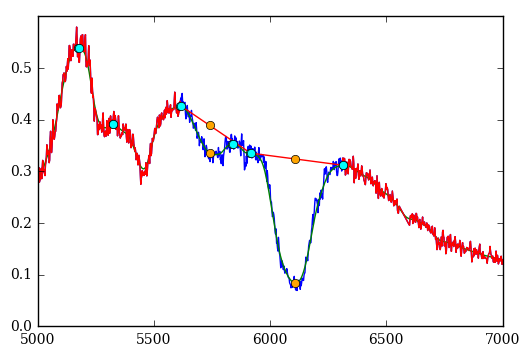

1996bo 1.16 0.224594256327 Check:  0.003 35.9032927337 33.2930311612
0.304596958421 9406.73475815


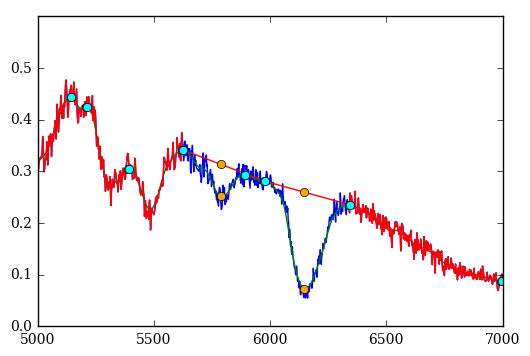

2000cf 1.16 0.328480452648 Check:  0.003 26.0061404885 27.7230668009
3
0.18777172839 9318498.10115


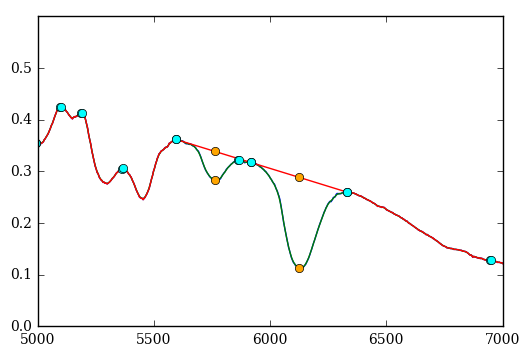

1994d_combined 1.37 0.317495181434 Check:  0.001 580.635122736 519.68782229
0.370826816464 160854.759673


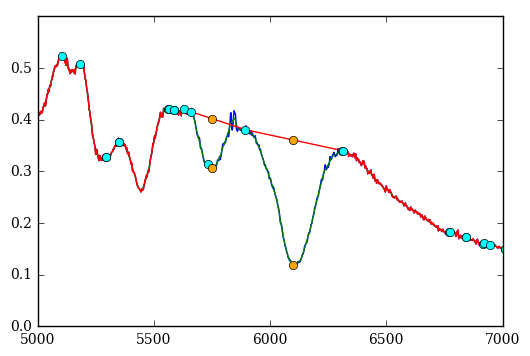

2005am_combined 1.3 0.395144623727 Check:  0.001 128.21026994 135.284739952
0.374756303976 420104.500011


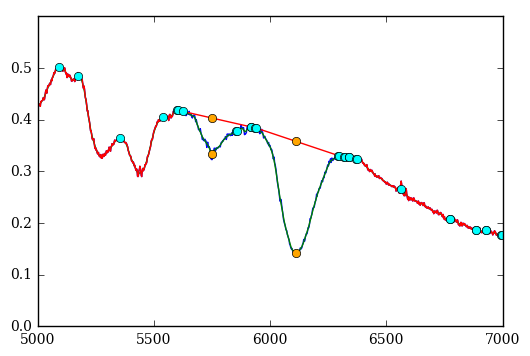

2003it_combined 1.36 0.326528314583 Check:  0.001 215.364677433 227.576809829
0.133846202315 7594134.19579


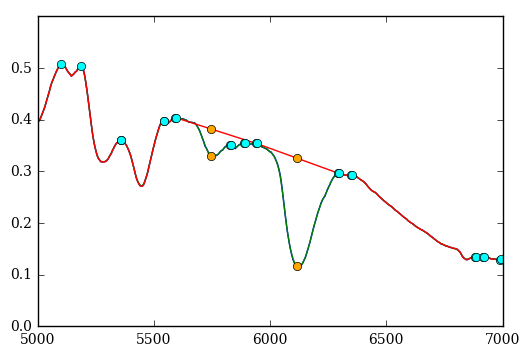

1996x_combined 1.26 0.249214347203 Check:  0.001 566.453862163 443.853961992
0.365584175418 10338.4944958


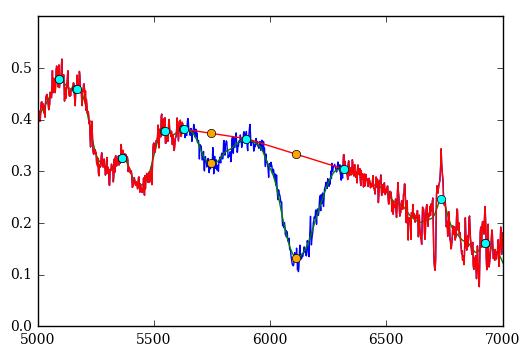

1998dx_combined 1.32 0.291658376342 Check:  0.003 33.4805589288 35.8914774789
0.160087413366 418483.152687


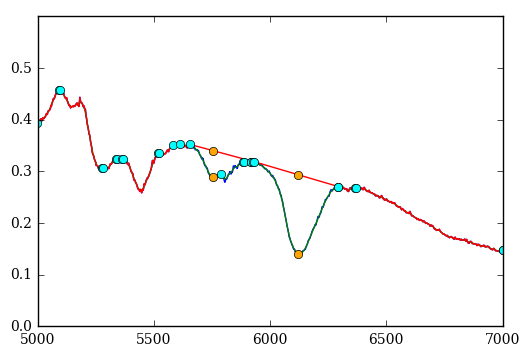

2005el_combined 1.27 0.334902583022 Check:  0.001 130.061600232 106.295586435
0.3842248543 90472.3909967


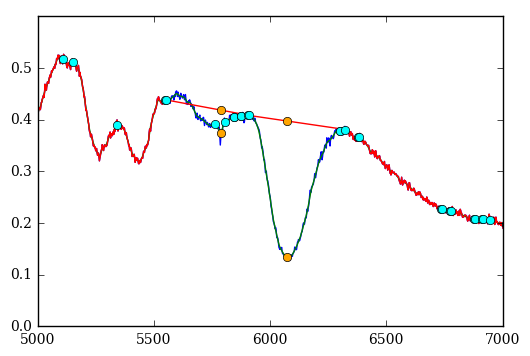

1998ef_combined 1.27 0.169590979662 Check:  0.001 101.97861459 109.041946156
0.224819401535 78448.1400134


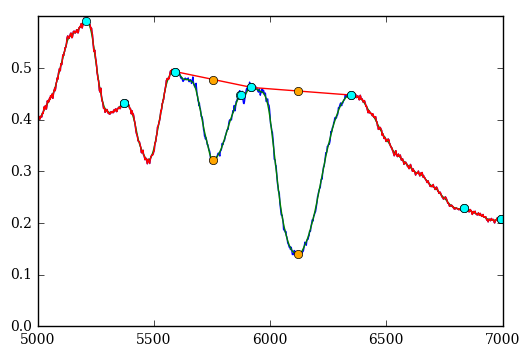

2004gs_combined 1.41 0.495267265454 Check:  0.0015 83.5736088828 70.5140949172
0.155953475976 3126618.79787


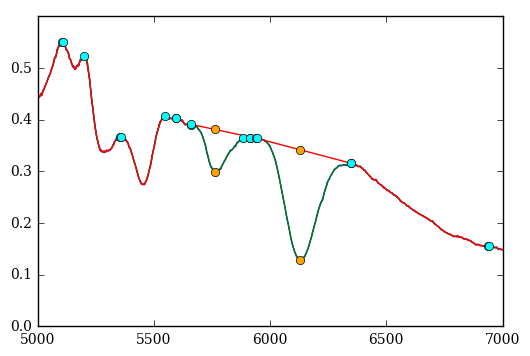

2006d_combined 1.35 0.382043689868 Check:  0.001 362.747508657 373.151548009
0.146313728637 1323275.097


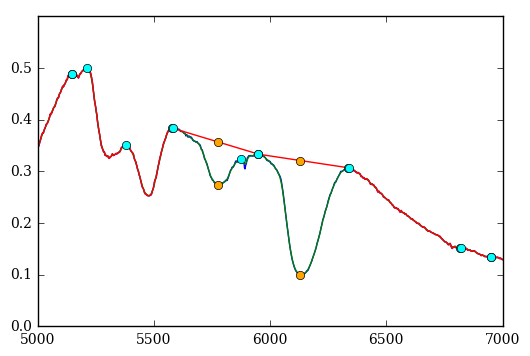

2001ep_combined 1.3 0.375202168944 Check:  0.001 215.550367813 211.064922469
0.223537493383 34078.9399481


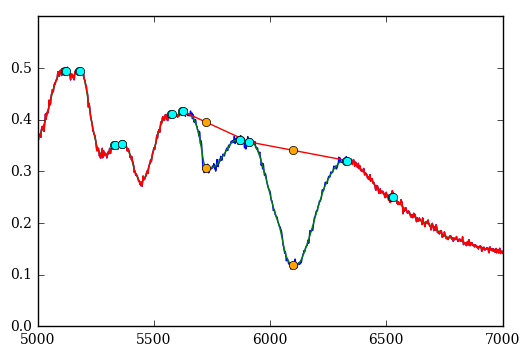

2004ef_combined 1.39 0.393726345971 Check:  0.0015 64.3230651829 75.9594723194
0.356338247762 46699.4516262


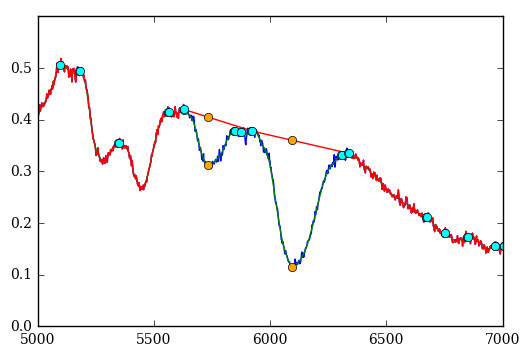

1999cc_combined 1.35 0.383815436701 Check:  0.0015 70.0545193506 75.8898640642
0.297495880502 1263504.20016


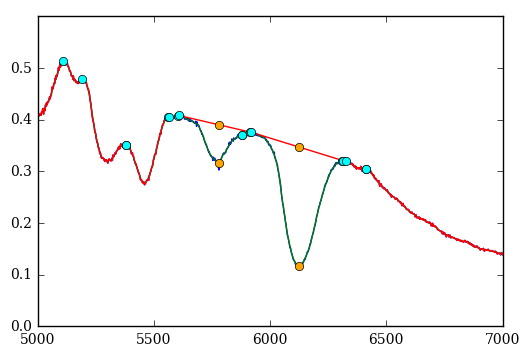

2005ki_combined 1.41 0.321689927194 Check:  0.001 218.529872366 226.072035377
0.245835069145 99696.6533638


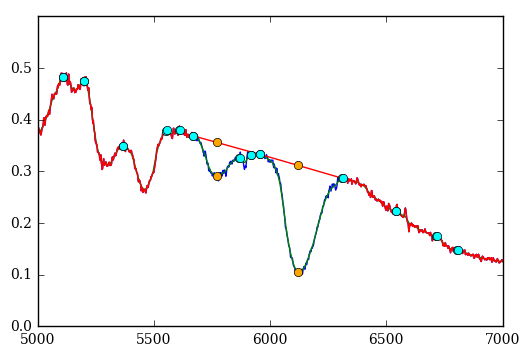

2005bo_combined 1.28 0.316681606247 Check:  0.0015 61.9769183187 67.7893318395
0.277306059571 79330.962936


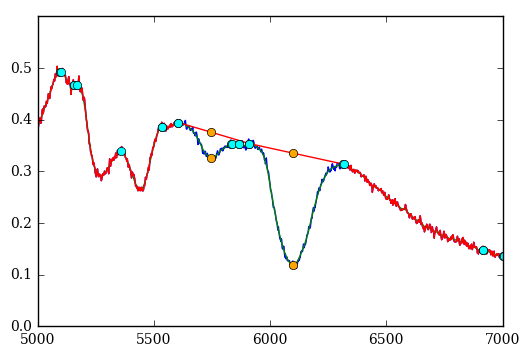

2007bd_combined 1.3 0.226747613427 Check:  0.0015 69.3235901655 79.0904342212
0.12273458398 387027.88076


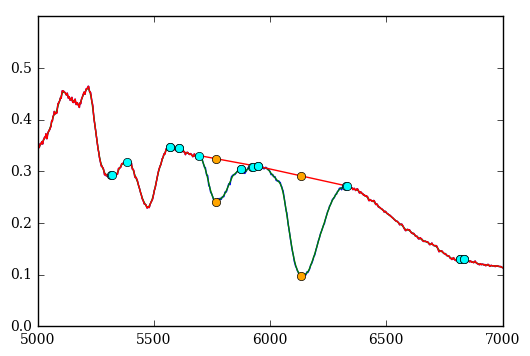

2007bc_combined 1.37 0.433959879527 Check:  0.001 110.485066805 101.674755781
0.136652421642 156660.877121


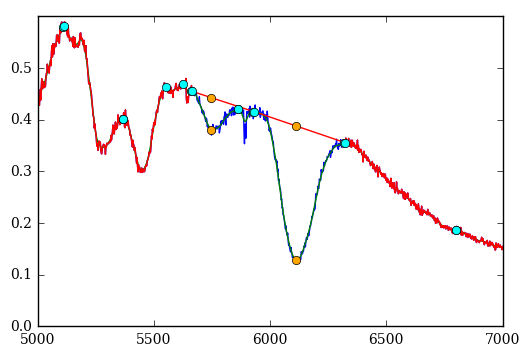

2005lz 1.34 0.241827628863 Check:  0.0015 67.6315411108 67.2021744101
0.167869898671 371724.16399


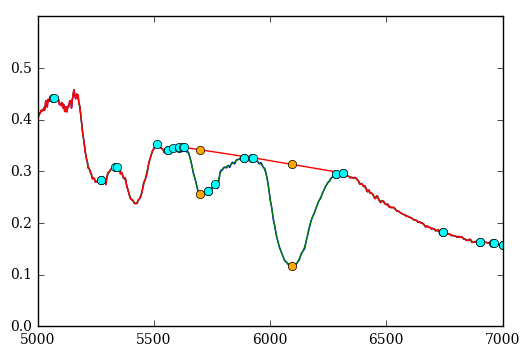

2006ej 1.26659174257 0.431675096142 Check:  0.001 119.032936127 107.94997635
0.424078448926 7399.29934631


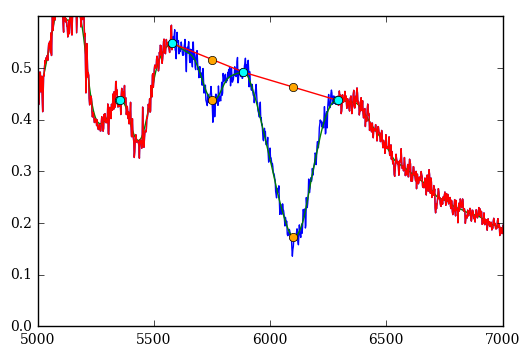

1994m 1.26 0.269931511686 Check:  0.003 26.7648188158 26.5734090305
0.390994106804 30488.3316582


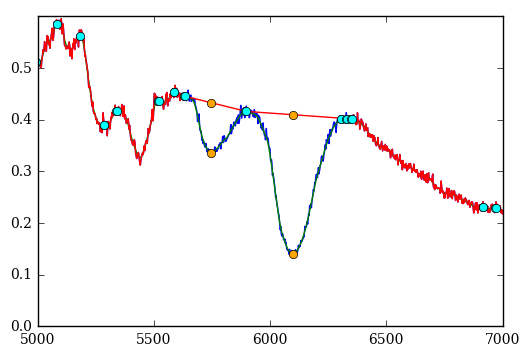

1997e 1.4 0.360050960645 Check:  0.0015 60.0983079834 63.9473186436
0.345291849405 5919.18601102


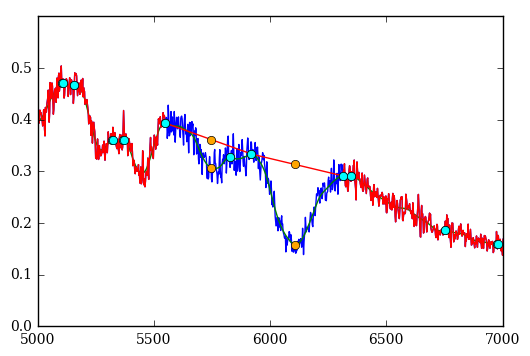

2002g 1.25 0.353342756558 Check:  0.003 23.0129184481 23.2306162189
0.371565261796 3989.38001919


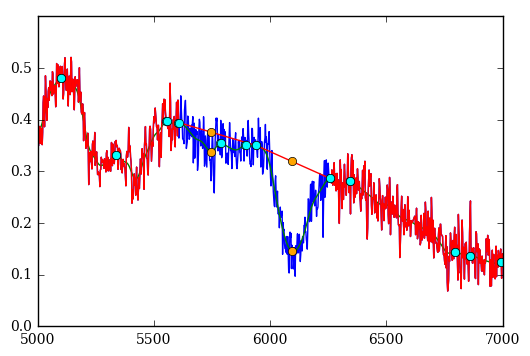

2003ic 1.30686535341 0.221627051816 Check:  0.003 21.9067776718 22.7842597003
0.351806865085 10755.827289


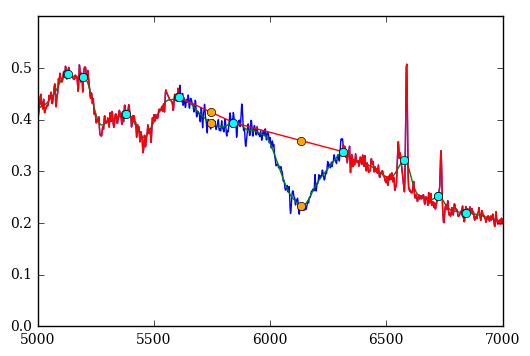

2006fw 1.28774437183 0.168759823864 Check:  0.003 33.8606225789 29.9279198719
0.198140635869 52394.5450956


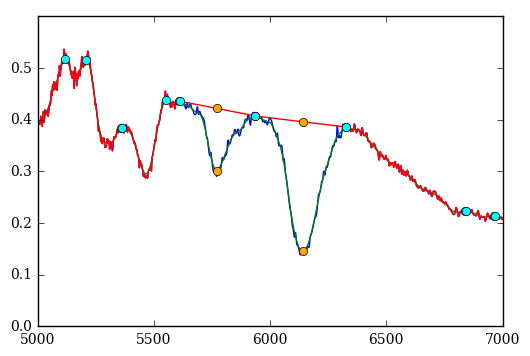

2015f 1.26 0.481629888256 Check:  0.002 51.6019580676 44.7480824439
4
0.162278956886 393566.235944


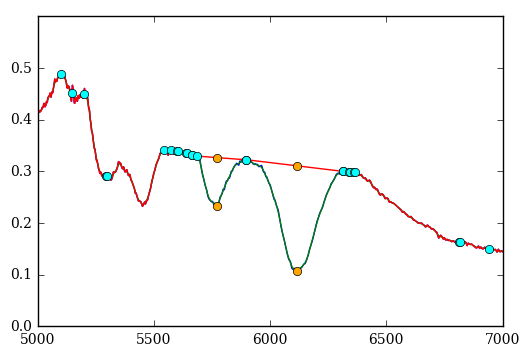

2006kf_combined 1.55 0.455289396904 Check:  0.001 111.477950228 110.466181202
0.217869434505 43174.1688859


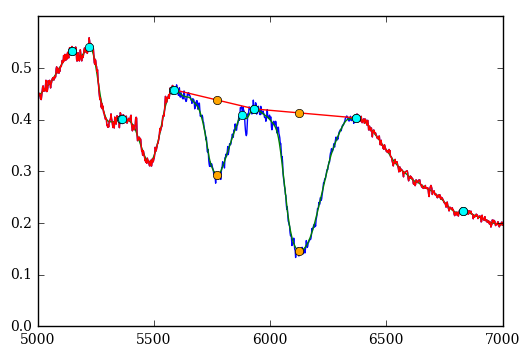

2006gj_combined 1.48 0.545904146587 Check:  0.002 53.5548968591 51.565582371
0.270644409213 411452.81376


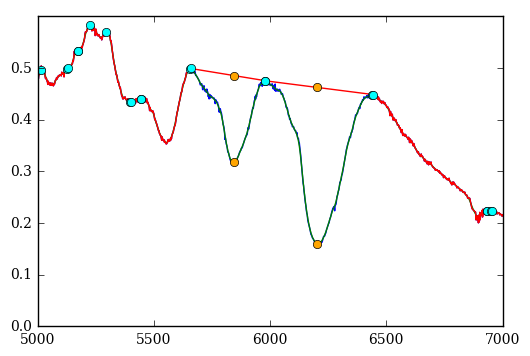

2008r_combined 1.54 0.555121390043 Check:  0.001 182.501686964 178.639777852
0.0913431618876 4753.84148234
Could not find maximum in a specified range!
1992a_combined 1.47 nan Check:  0.004 13.0989022503 6.85695717445
0.380692737991 1313.72783949


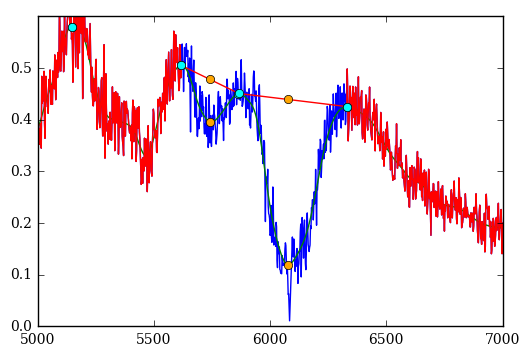

1994t_combined 1.51 0.256366478391 Check:  0.004 10.8795854881 11.2425735047
0.262245454685 25803.1642114


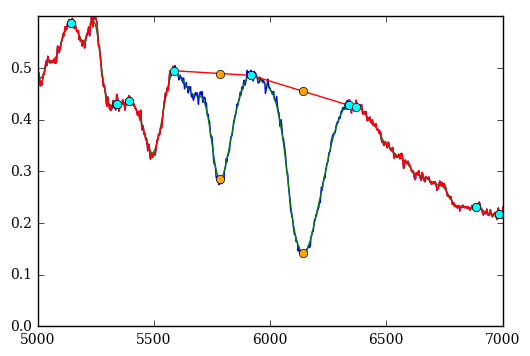

2006gt_combined 1.66 0.655828165375 Check:  0.002 49.606975017 44.5107208666
0.188380377447 5130347.34784


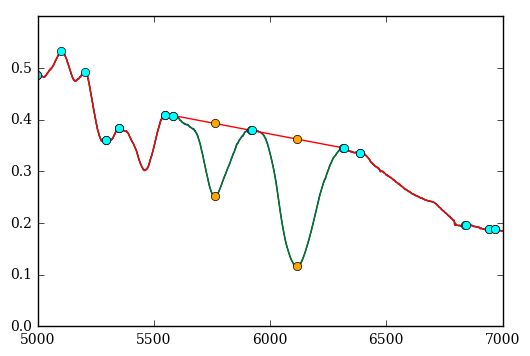

2007on_combined 1.64106422829 0.569533095157 Check:  0.001 550.722095912 422.566975543
0.422328732119 18967.323532


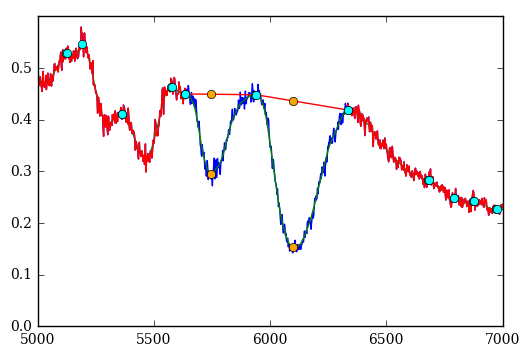

2007au_combined 1.69 0.544241297087 Check:  0.002 52.7228208574 54.4706286351
0.194114658749 462481.902908


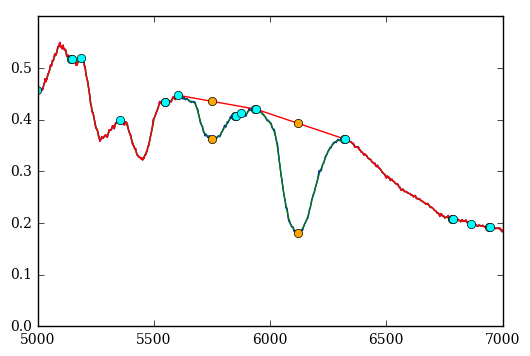

2006n_combined 1.5 0.347950215373 Check:  0.001 151.107470627 100.796531415
0.146852780835 190243.575335


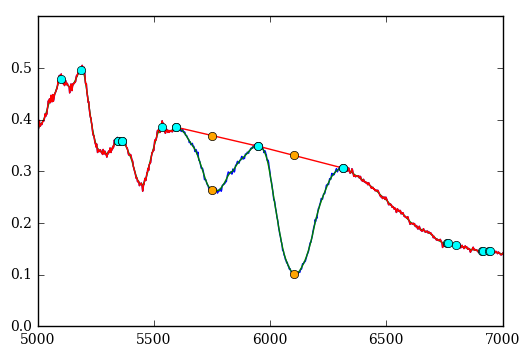

2007ci_combined 1.6 0.456653643885 Check:  0.0015 89.1726271267 78.5451067308
0.198608743649 1004053.30743


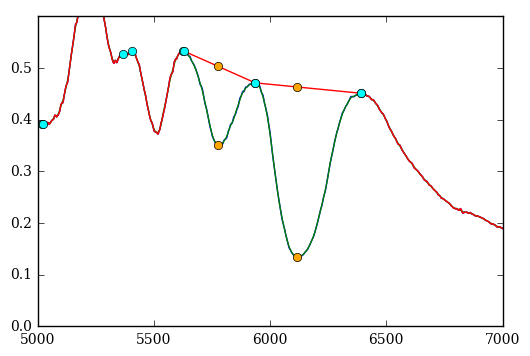

1999gh_combined 1.69 0.466387076974 Check:  0.001 267.010859192 219.872735945
0.375570963245 145759.192821


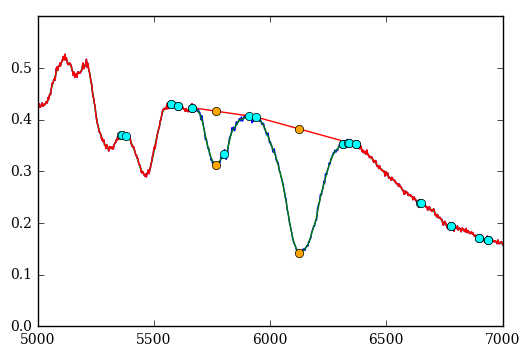

1999ej_combined 1.48 0.431861948049 Check:  0.001 125.250458155 133.026903438
0.36604042289 93879.0427552


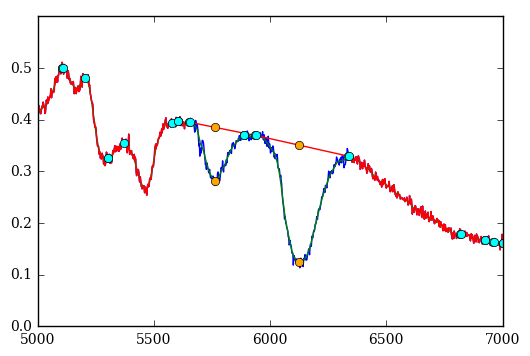

2003iv_combined 1.65 0.454696442488 Check:  0.0015 99.9857263303 107.00307895
0.35767804424 45009.4613015


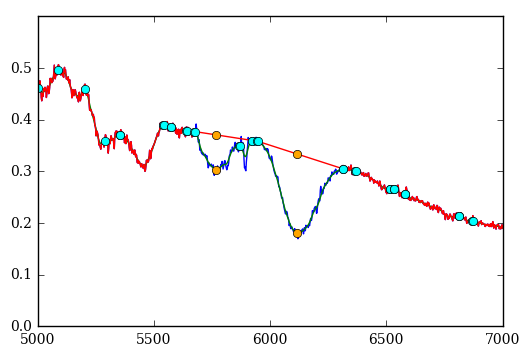

2001fh_combined 1.51 0.439507202201 Check:  0.0015 65.6265225324 71.5507049367
0.207343471481 47304.709239


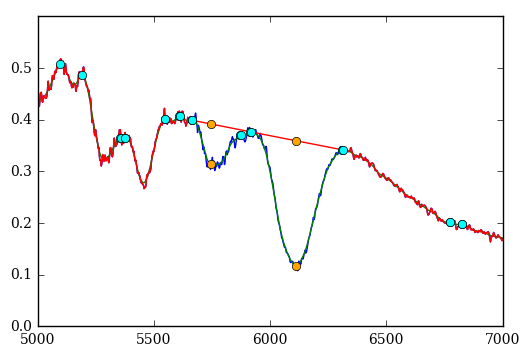

2003u_combined 1.46 0.323404412102 Check:  0.002 57.0314626689 56.0967884424
0.180659226121 274283.872992


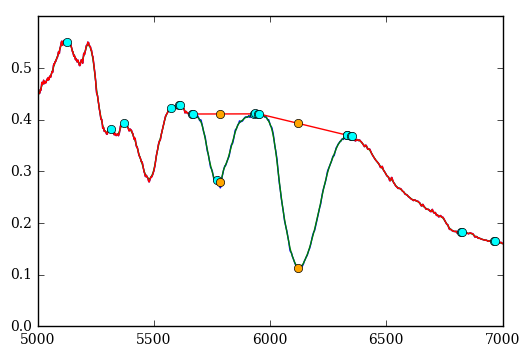

2000dk_combined 1.62 0.474354521916 Check:  0.001 120.547542195 105.030756148
0.248558664135 1396424.36262


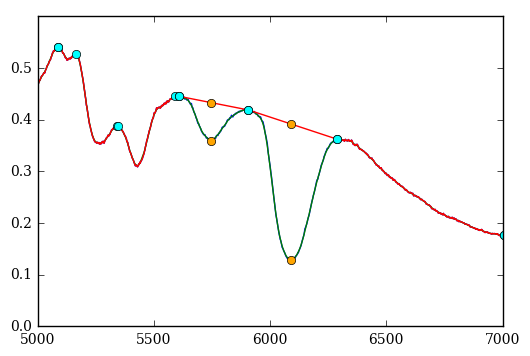

2002he_combined 1.44 0.282918777968 Check:  0.001 323.414712845 317.715007456
0.39041102558 49412.6018465


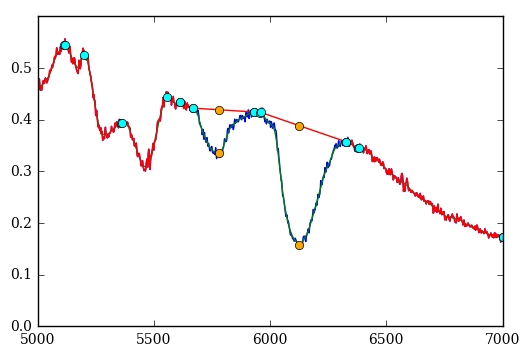

1998co 1.43421892233 0.364431643425 Check:  0.0015 75.127426164 79.1910000517
0.423543030586 22654.9994101


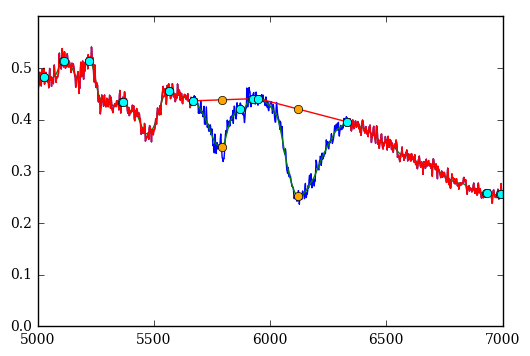

2002do 1.56 0.544504945557 Check:  0.002 54.2158824616 56.9630153063
0.341295777553 5393.7177362


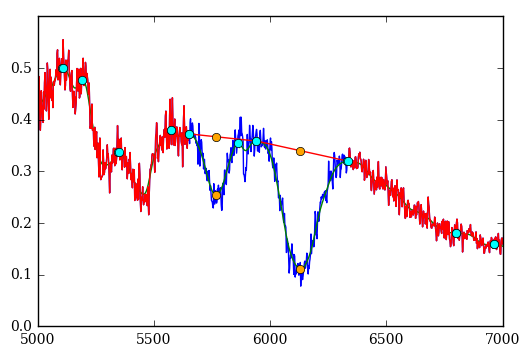

2002hw 1.44 0.491965680392 Check:  0.003 21.1319897423 21.6202650869
0.46010919137 11883.8086067


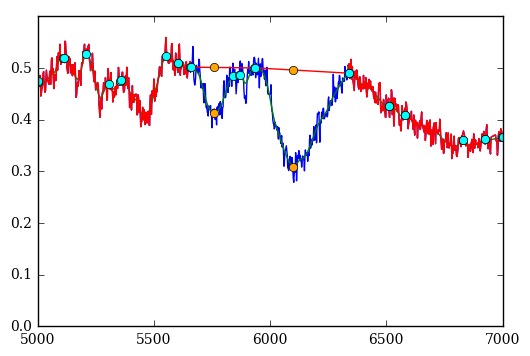

2005mc 1.63 0.473383269083 Check:  0.002 44.9241017449 48.9215632894
5
0.343387867303 86679.5743798


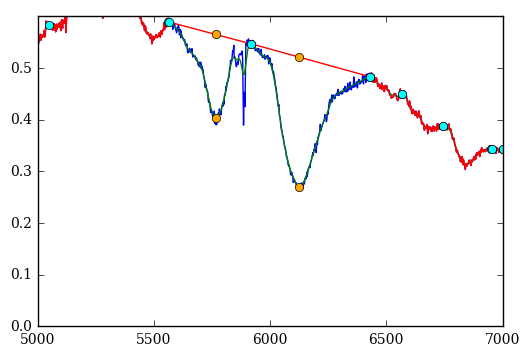

2006mr_combined 1.91637192734 0.640490778469 Check:  0.0015 90.8517145728 99.197519234
0.267453249801 51350.3792362


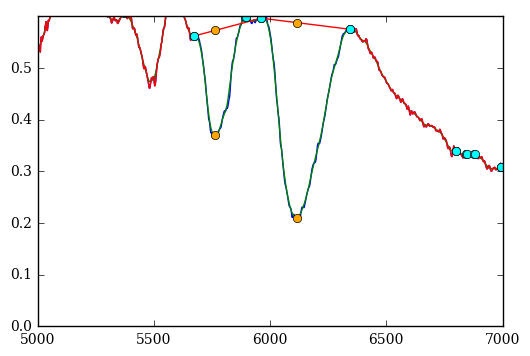

1999da_combined 1.9 0.535526426818 Check:  0.0015 78.1943699319 66.21314957
0.303142324631 11677.4940096


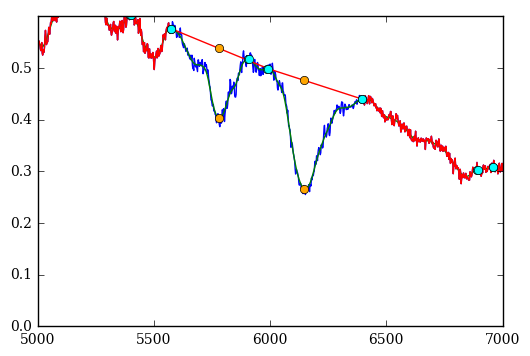

2007ax_combined 1.87 0.646457937931 Check:  0.002 57.389124453 59.1607021071
0.266803741496 30085.3060424


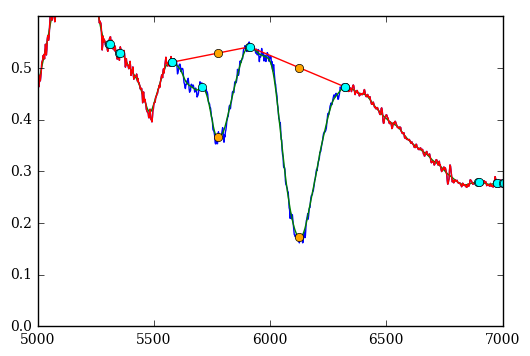

2002fb_combined 1.77 0.498585745015 Check:  0.002 53.2561518165 46.7102931938
0.331426572544 340026.302692


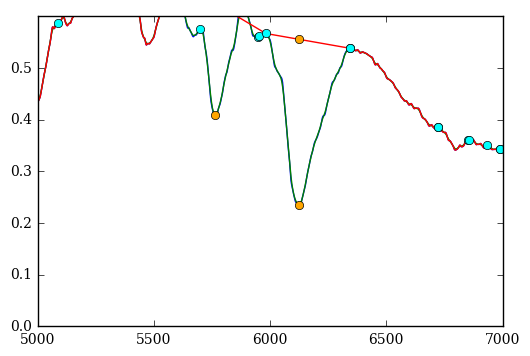

1991bg_combined 1.82682864918 0.674241295788 Check:  0.001 226.664205407 205.418802618
0.343499769733 622629.528936


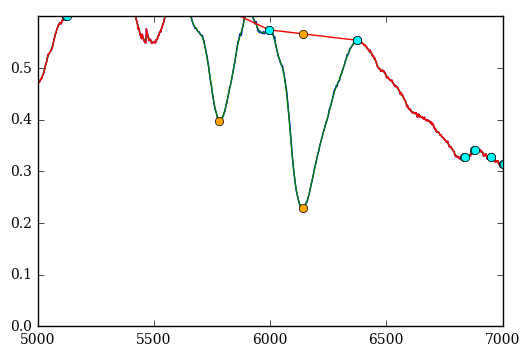

1999by_combined 1.97 0.65619328099 Check:  0.001 313.394219333 321.090637766
0.301309205827 28785.7051344


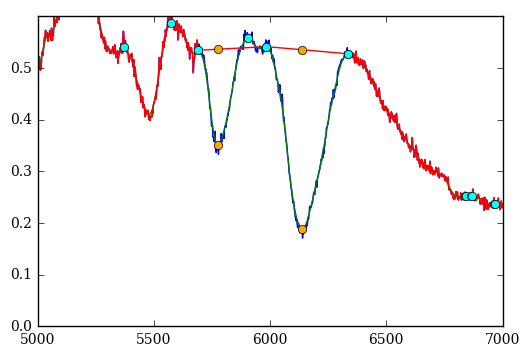

2007ba_combined 1.89 0.533589487439 Check:  0.002 54.3577897949 51.7524973249
0.313248633014 104318.23316


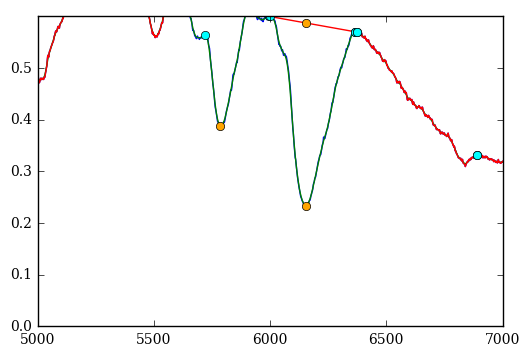

2005ke_combined 1.82 0.729989102365 Check:  0.001 155.543746402 119.931936584
0.47017454089 187100.352576


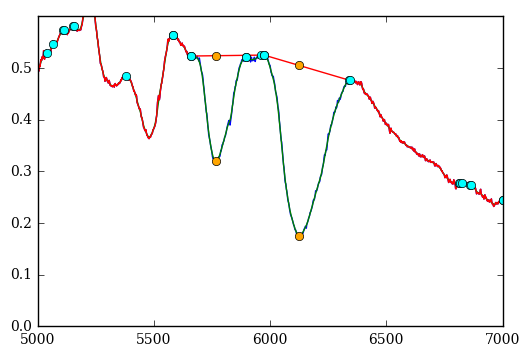

1998bp_combined 1.79 0.619389349906 Check:  0.001 178.209508032 183.88218641
0.505202303045 13862.1669735


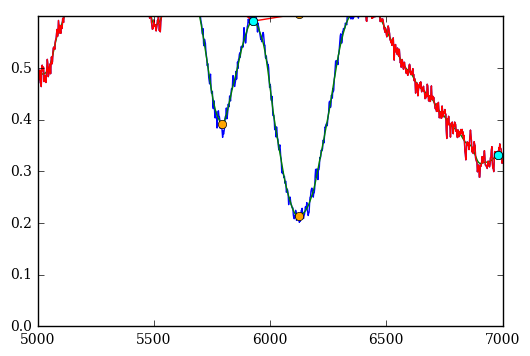

1998de_combined 1.88 0.620694566897 Check:  0.002 53.7821761955 56.1955372403
0.285295050367 621447.299444


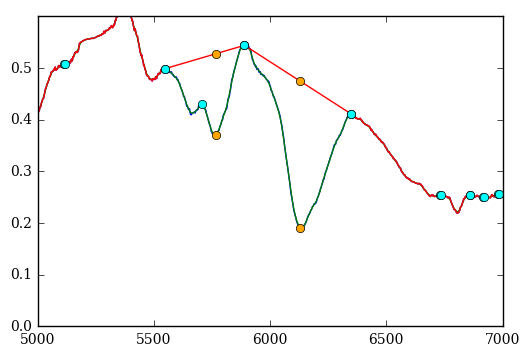

2009f_combined 1.86725515562 0.555317646706 Check:  0.001 252.329431166 235.02148028
0.283941621005 3651.27328262


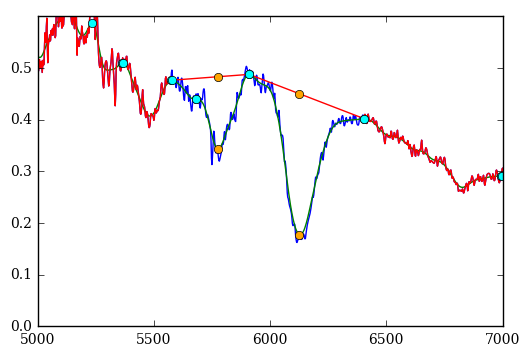

2006cs 1.9352579802 0.511915210609 Check:  0.003 27.7123104295 17.7523768404
0.279598074538 347788.117932


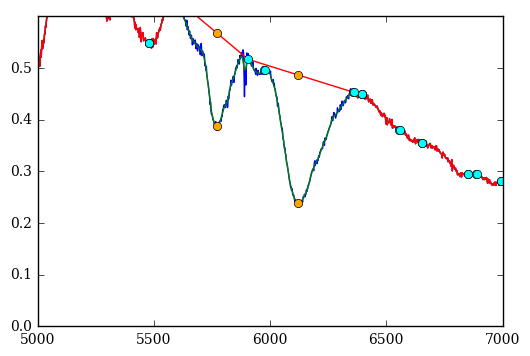

2007n 1.874690474 0.729516486983 Check:  0.001 140.729485511 143.915468826
0.506197252621 6006.39688391


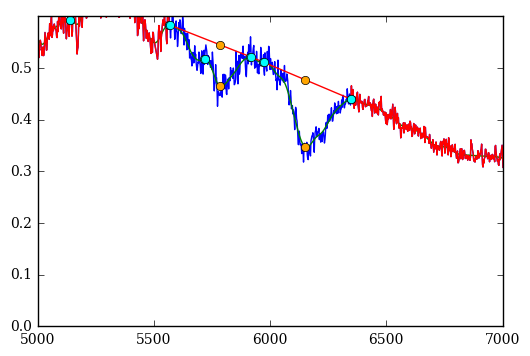

2007al 1.89 0.621399892222 Check:  0.003 37.9877488132 42.3829815175
0.347820359932 315.980206838


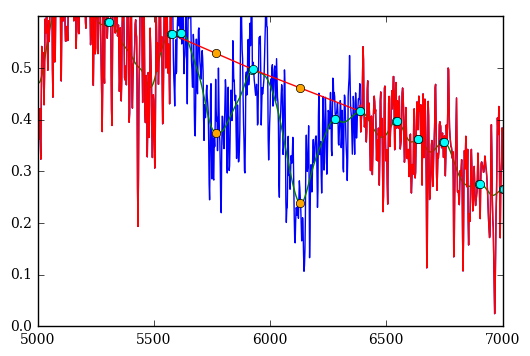

2005bl 1.93 0.687455677389 Check:  0.004 5.85008914696 5.93985052792


In [22]:
all_dm15s_med = []
all_ratios_med = []
i=0
bad_measurements = ['sn2004dt-20040816.413-ui-corrected.flm','sn1997bp-19970407.42-mmt.flm','sn2003W-20030207.40-fast.flm',
                    'sn2005A-20050107.25-fast.flm','SN08ia_081210_r01_NTT_EF.dat','SN06mr_061109_r01_CLA_LD.dat',
                    'sn2006bt-20060428.425-ui.flm', 'sn1998es-19981125-ui-corrected.flm','sn1999aa-19990223-ui.flm',
                    'sn1999dq-19990911.46-fast.flm','sn2001V-20010301.47-fast.flm','sn2007S-20070209.30-fast.flm',
                    'SN08fp_080921_b01_DUP_WF.dat','sn2001bf-20010516-ui-corrected.flm','sn2006cz-20060626.304-ui.flm',
                    'sn1999cl-19990612.17-fast.flm','sn2005el-20050928.47-fast.flm']
for sn_arr in sn_arrays_med:
    print i
    dm15_bin = []
    ratio_bin = []
    for SN in sn_arr:
        if SN.dm15_source != None:
            dm15 = SN.dm15_source
        else:
            dm15 = SN.dm15_from_fits
        var = 1./SN.ivar
        if SN.source != 'swift_uv' and SN.filename not in bad_measurements:
            print np.median(SN.flux[SN.x1:SN.x2]), np.median(SN.ivar[SN.x1:SN.x2])
#             vexp, SNR = sa.find_vexp(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=vexp, dm15 = dm15)
            print SN.name, SN.dm15, r, 'Check: ', vexp, SNR, SN.SNR
            dm15_bin.append(SN.dm15)
            ratio_bin.append(r)
    all_dm15s_med.append(dm15_bin)
    all_ratios_med.append(ratio_bin)
    i+=1

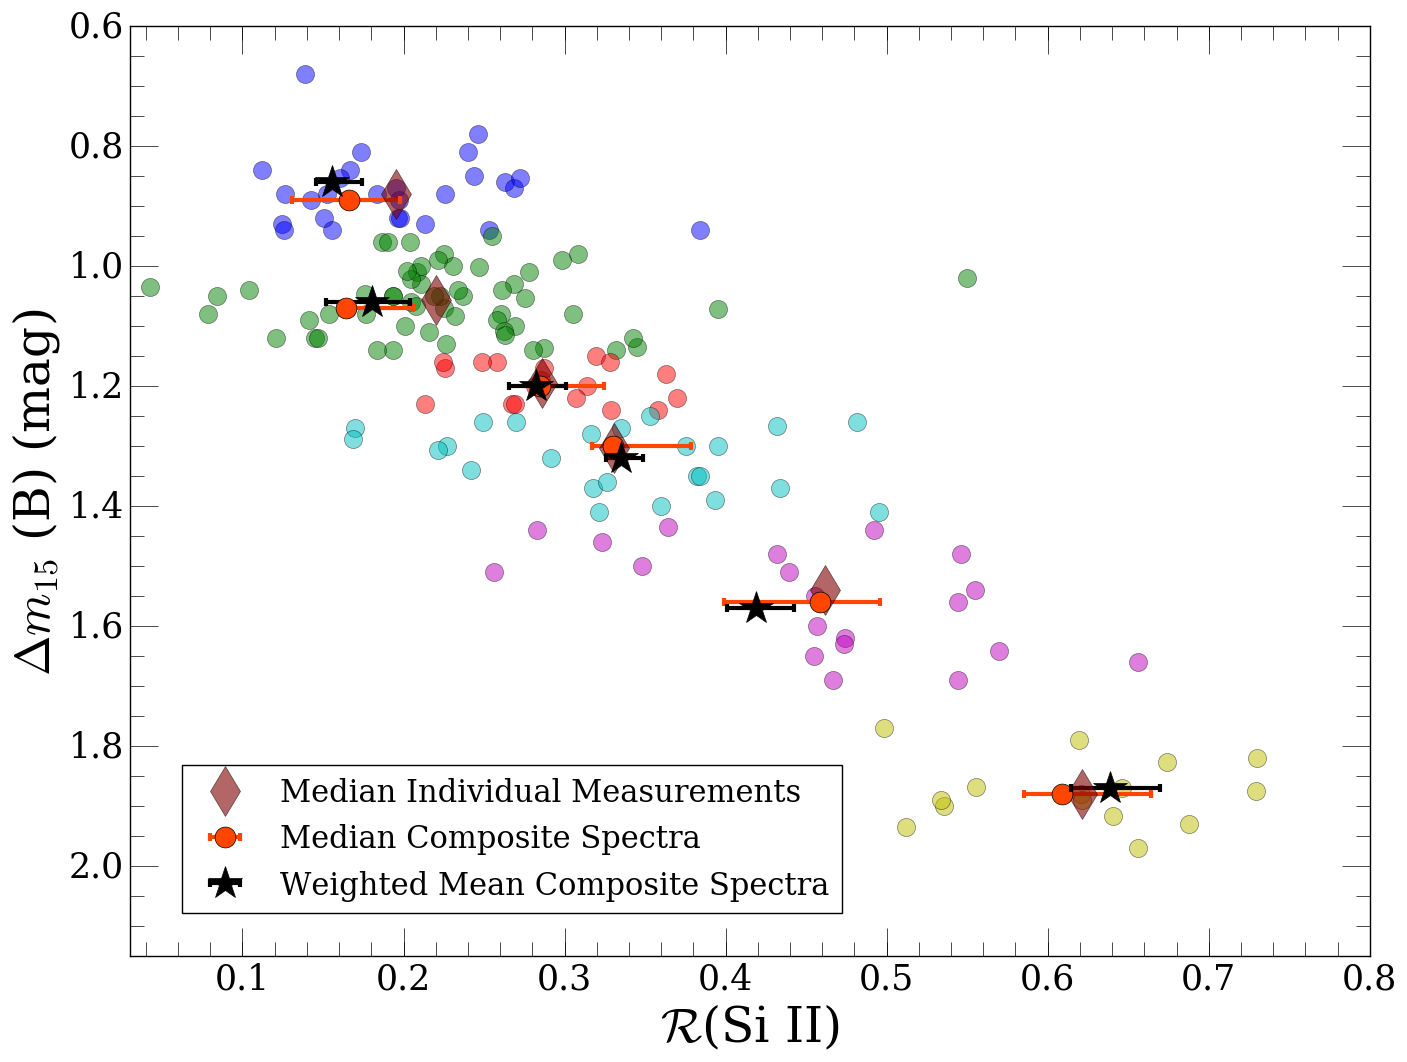

In [24]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('$\mathcal{R}$(Si II)', fontsize = 35)
plt.ylabel('$\Delta m_{15}$ (B) (mag)', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
dm15_bin_medians = []
ratio_bin_medians = []
for i in range(len(all_dm15s_med)):
    dm15_bin_medians.append(np.nanmedian(all_dm15s_med[i]))
    ratio_bin_medians.append(np.nanmedian(all_ratios_med[i]))
    plt.plot(np.asarray(all_ratios_med[i]), all_dm15s_med[i], 'o', alpha=.5, markersize=13, zorder=1)
plt.plot(ratio_bin_medians, dm15_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(si_ratios_med, dm15s_med, xerr=errors_med, color = 'orangered', fmt='o', markersize=15, elinewidth=3, capthick=3, label='Median Composite Spectra')
plt.errorbar(si_ratios_mean, dm15s_mean, xerr=errors_mean, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra')
plt.gca().invert_yaxis()
plt.xlim([0.03,0.8])
plt.ylim([2.15, 0.6])
# plt.legend(loc=3, fontsize = 20, numpoints=1)
plt.legend( loc=3, bbox_to_anchor=(0.03, 0.03, 0.48, 0.5), fontsize=22, numpoints=1)
plt.savefig('../../../Paper_Drafts/main_composites_updated/si_ratio_wmedian.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/si_ratio_median.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
test_dm15s = []
test_ratios = []
for SN in sn_arrays_med[1]:
    if SN.dm15_source != None:
        dm15 = SN.dm15_source
    else:
        dm15 = SN.dm15_from_fits
    var = 1./SN.ivar
#     r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=.002, dm15 = dm15)
    print SN.filename, dm15, SN.phase

In [ ]:
comp1 = comps_dm15_max_fewer_bins_med[0]
comp2 = comps_dm15_max_fewer_bins_mean[0]

In [ ]:
r = sa.measure_si_ratio(comp2.wavelength[comp2.x1:comp2.x2], comp2.flux[comp2.x1:comp2.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_mean:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()

In [ ]:
r = sa.measure_si_ratio(comp1.wavelength[comp1.x1:comp1.x2], comp1.flux[comp1.x1:comp1.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_med:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()